# Pymaceuticals Inc.
---

### Analysis
---
Over the course of 45 days, this study analyzes the effects of a placebo and nine drug treatment regimens on the tumor development of 248 mice suffering from a commonly occurring form of skin cancer, squamous cell carcinoma (SCC).  From the initial results, the most promising treatments include Ceftamin, Infubinol, Ramicane, and this company’s drug of interest, Capomulin.  The study’s ultimate purpose is to compare the performance of Capomulin against the other drug candidates.

A superficial review yields some interesting observations concerning the efficacy of the top four drugs.  Except for Ramicane with its symmetrical tumor volume distribution, all the treatment regimens have skewed distributions towards the low end indicated by a difference between the median and mean below.  Moreover, Ramicane and Capomulin have the narrowest distributions while Ceftamin’s is the widest, about as wide as the placebo’s, followed by Infubinol.  Generally, the narrower distributions with their lower variances infer consistency in outcomes.  On top of that, Ramicane and Capomulin have the lowest median tumor volumes; Ceftamin and Infubinol have the same median, which is noticeably higher and comparable to the placebo’s value.  What’s more, Capomulin’s mouse weight and tumor volume metrics have a very strong relationship evidenced by a 0.842 linear correlation.

Unfortunately, upon closer examination, there are serious anomalies in data collection and quality control.  For instance, Infubinol’s distribution has a single low outlier: inexplicably, one of only two data points from a single mouse in a study where each mouse should have ten.  From this discovery, further investigation reveals that Ramicane and Capomulin have 22-29% more data points than the other treatment regimens except for Propriva where the deviation grows to 55%.  The origin of this discrepancy is data points per mouse: each candidate has about 25 mice for its trial, however, unlike the others who have fewer – in some cases, appreciably fewer – Ramicane’s and Capomulin’s mice overwhelmingly have the maximum number of data points, ten.  If we assume that each trial has 25 mice with ten data points, then the total should be 2,500 not 1,880: hence, the study is missing 620 data points or 24.8% of its expected total.  In addition, the original number of mice was 249, but one mouse had duplicate timepoints with incredulously different tumor volumes.  

Is this situation a product of poor administration or a deliberate attempt to manipulate results in favor of certain unmerited treatments?  Ostensibly, Ramicane is the most promising drug with Capomulin a close second, and neither Ceftamin nor Infubinol have any discernable effect on decreasing tumor volume.  In truth, this study should be invalidated due to asymmetrical data collection, suspicious inconsistencies, and insufficient sample spaces.  Therefore, I recommend another study of these treatments where each mouse uniformly provides the same quantity of data points for analysis, the number of mice per trial increases, at least, by an order of magnitude, the weight of each mouse in the study is approximately the same, and clinical trial managers review data closely immediately after collection.  Once information based on a valid and accurate study is forthcoming and available to management, the company can then use drug cost to determine each treatment’s level of effectiveness per dollar spent and examine the impact of varying the dosage of Capomulin, or any other treatment for SCC, based on a subject’s weight.

In [1]:
#*******************************************************************************************
 #
 #  File Name:  Pymaceuticals.ipynb
 #
 #  File Description:
 #      This interactive Python notebook, Pymaceuticals.ipynb, reads two csv files,
 #      Mouse_metadata.csv and Study_results.csv, in the Resources folder, which 
 #      contain data about a pharmaceutical company's most recent animal study. 
 #      In this study, two hundred forty-nine mice, who were identified with 
 #      tumors, received treatment from a range of drug regimens. Over the course 
 #      of 45 days, tumor development was observed and measured. The purpose of 
 #      this study was to compare the performance of Pymaceuticals’ drug of interest, 
 #      Capomulin, against the other treatment regimens.  This Python script generates 
 #      all of the tables and figures needed for a technical report of this clinical 
 #      study.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  08/18/2023      Initial Development                     N. James George
 #
 #******************************************************************************************/

import PymaceuticalsFunctions as local_function
import PymaceuticalsSubRoutines as local_subroutine

import PyConstants as constant
import PyFunctions as function
import PyLogConstants as log_constant
import PyLogFunctions as log_function
import PyLogSubRoutines as log_subroutine
import PySubRoutines as subroutine

import numpy as np
import pandas as pd

In [2]:
CONSTANT_LOCAL_FILE_NAME \
    = 'Pymaceuticals.ipynb'

CONSTANT_MOUSE_INFO_CSV_FILE_PATH \
    = './Resources/MouseMetaData.csv'

CONSTANT_MEDICAL_STUDY_CSV_FILE_PATH \
    = './Resources/StudyResults.csv'


log_subroutine \
    .SetLogMode \
        (False)

log_subroutine \
    .SetDebugMode \
        (False)

log_subroutine \
    .SetImageMode \
        (False)


log_subroutine \
    .BeginProgramExecution \
        ('Pymaceuticals')

# <br> **Section 1: Data Preparation**

## **Section 1.1: Data Retrievel**

### **Read CSV Files into DataFrames**

In [3]:
mouseInfoDataFrame \
    = function. \
        ReturnCSVFileAsDataFrame \
            (CONSTANT_MOUSE_INFO_CSV_FILE_PATH)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseInfoDataFrame)

In [4]:
medicalStudyDataFrame \
    = function. \
        ReturnCSVFileAsDataFrame \
            (CONSTANT_MEDICAL_STUDY_CSV_FILE_PATH)


log_function \
    .DebugReturnObjectWriteObject \
        (medicalStudyDataFrame)

###  **Merge DataFrames**

In [5]:
completeMedicalStudyDataFrame \
    = function \
        .ReturnMergedDataFrame \
            (mouseInfoDataFrame,
             medicalStudyDataFrame,
             'left',
             'Mouse ID')


log_function \
    .DebugReturnObjectWriteObject \
        (completeMedicalStudyDataFrame)

### **Display Merged DataFrame**

In [6]:
captionString \
    = 'Table 1.1.1: Complete Medical Study DataFrame'

currentStylerObject \
    = local_function \
        .ReturnFormattedCompleteMedicalStudyStylerObject \
            (function \
                 .ReturnStylerObjectStandardFormat \
                    (completeMedicalStudyDataFrame.head(12), ''),
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
k403,Ramicane,Male,21,16.00,0,45.00,0
k403,Ramicane,Male,21,16.00,5,38.83,0
k403,Ramicane,Male,21,16.00,10,35.01,1
k403,Ramicane,Male,21,16.00,15,34.22,1
k403,Ramicane,Male,21,16.00,20,33.00,1
k403,Ramicane,Male,21,16.00,25,33.46,1
k403,Ramicane,Male,21,16.00,30,31.10,1
k403,Ramicane,Male,21,16.00,35,26.55,1
k403,Ramicane,Male,21,16.00,40,24.37,1
k403,Ramicane,Male,21,16.00,45,22.05,1


## **Section 1.2: Mouse IDs with Duplicate Timepoints**

### **Display the Number of Unique Mouse IDs**

In [7]:
numberOfUniqueMouseIDsIntegerVariable \
    = function \
        .ReturnNumberOfUniqueElementsInColumn \
            (completeMedicalStudyDataFrame, 
             'Mouse ID')

log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'The number of unique mouse IDs in the complete medical study DataFrame is ' \
         + '{:,}.' \
            .format \
                (numberOfUniqueMouseIDsIntegerVariable) \
         + '\033[0m')

The number of unique mouse IDs in the complete medical study DataFrame is 249.


### **Check for Any Mouse IDs with Duplicate Timepoints**

In [8]:
duplicateMouseIDDataFrame \
    = function \
        .ReturnDuplicateRowsAsDataFrame \
            (completeMedicalStudyDataFrame,
             ['Mouse ID', 
              'Timepoint'])


log_function \
    .DebugReturnObjectWriteObject \
        (duplicateMouseIDDataFrame)

### **Display Mouse IDs with Duplicate Timepoints**

In [9]:
captionString \
    = 'Table 1.2.1: Mouse IDs with Duplicate Timepoints'

currentStylerObject \
    = local_function \
        .ReturnFormattedCompleteMedicalStudyStylerObject \
            (function \
                 .ReturnStylerObjectStandardFormat \
                    (duplicateMouseIDDataFrame, ''),
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
g989,Propriva,Female,21,26.00,0,45.00,0
g989,Propriva,Female,21,26.00,5,47.57,0
g989,Propriva,Female,21,26.00,10,49.88,0
g989,Propriva,Female,21,26.00,15,53.44,0
g989,Propriva,Female,21,26.00,20,54.66,1


### **Display All Mouse IDs with Duplicate Timepoints Records**

In [10]:
duplicateMouseIDsList \
    = duplicateMouseIDDataFrame \
        ['Mouse ID'] \
            .unique() \
            .tolist()


log_function \
    .DebugReturnObjectWriteObject \
        (duplicateMouseIDsList)

In [11]:
captionString \
    = 'Table 1.2.2: All Mouse IDs with Duplicate Timepoints Records'

currentStylerObject \
    = local_function \
        .ReturnFormattedCompleteMedicalStudyStylerObject \
            (function \
                 .ReturnStylerObjectStandardFormat \
                    (function \
                         .ReturnDataFrameRowsWithValue \
                             (completeMedicalStudyDataFrame, 
                              'Mouse ID', 
                              duplicateMouseIDsList), ''),
                     captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
g989,Propriva,Female,21,26.00,0,45.00,0
g989,Propriva,Female,21,26.00,0,45.00,0
g989,Propriva,Female,21,26.00,5,48.79,0
g989,Propriva,Female,21,26.00,5,47.57,0
g989,Propriva,Female,21,26.00,10,51.75,0
g989,Propriva,Female,21,26.00,10,49.88,0
g989,Propriva,Female,21,26.00,15,51.33,1
g989,Propriva,Female,21,26.00,15,53.44,0
g989,Propriva,Female,21,26.00,20,55.33,1
g989,Propriva,Female,21,26.00,20,54.66,1


### **Clean Medical Study DataFrame without Mouse IDs with Duplicate Timepoints Records**

In [12]:
cleanCompleteMedicalStudyDataFrame \
    = function \
        .ReturnDataFrameRowsWithoutValue \
            (completeMedicalStudyDataFrame, 
             'Mouse ID', 
             duplicateMouseIDsList)


log_function \
    .DebugReturnObjectWriteObject \
        (cleanCompleteMedicalStudyDataFrame)

### **Display the Updated Number of Unique Mouse IDs**

In [13]:
updatedNumberOfUniqueMouseIDsIntegerVariable \
    = function \
        .ReturnNumberOfUniqueElementsInColumn \
            (cleanCompleteMedicalStudyDataFrame, 
             'Mouse ID')

log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'The updated number of unique mouse IDs in the complete medical study ' \
         + 'DataFrame is {:,}.' \
            .format \
                (updatedNumberOfUniqueMouseIDsIntegerVariable) \
         + '\033[0m')

The updated number of unique mouse IDs in the complete medical study DataFrame is 248.


# <br> **Section 2: Tumor Volume Summary Statistics**

## **Section 2.1: Statistical Calculations**

### **New Medical Study DataFrame Grouped by Drug Regimen**

In [14]:
completeMedicalStudyGroupedByRegimenDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Drug Regimen')

### **Tumor Volume (Mean)**

In [15]:
meanTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
        ['Tumor Volume (mm3)'] \
            .mean()


log_function \
    .DebugReturnObjectWriteObject \
        (meanTumorVolumeSeries)

### **Tumor Volume (Median)**

In [16]:
medianTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
        ['Tumor Volume (mm3)'] \
            .median()


log_function \
    .DebugReturnObjectWriteObject \
        (medianTumorVolumeSeries)

### **Tumor Volume (Variance)**

In [17]:
varianceTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
        ['Tumor Volume (mm3)'] \
            .var()


log_function \
    .DebugReturnObjectWriteObject \
        (varianceTumorVolumeSeries)

### **Tumor Volume (Standard Deviation)**

In [18]:
standardTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
        ['Tumor Volume (mm3)'] \
            .std()


log_function \
    .DebugReturnObjectWriteObject \
        (standardTumorVolumeSeries)

### **Tumor Volume (Standard Errror of the Mean)**

In [19]:
standardErrorOfTheMeanTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
        ['Tumor Volume (mm3)'] \
            .sem()


log_function \
    .DebugReturnObjectWriteObject \
        (standardErrorOfTheMeanTumorVolumeSeries)

### **Tumor Volume Summary Statistics DataFrame**

In [20]:
tumorVolumeSummaryStatisticsDataFrame \
    = pd \
        .DataFrame({
            'Mean':
                meanTumorVolumeSeries,
            'Median':
                medianTumorVolumeSeries,
            'Variance':
                varianceTumorVolumeSeries,
            'Standard Deviation':
                standardTumorVolumeSeries,
            'Standard Error of the Mean':
                standardErrorOfTheMeanTumorVolumeSeries})


log_function \
    .DebugReturnObjectWriteObject \
        (tumorVolumeSummaryStatisticsDataFrame)

## **Section 2.2: Display Summary Statistics (Tumor Volume)**

### **Display Summary Statistics**

In [21]:
captionString \
    = 'Table 2.2.1: Summary Statistics (Tumor Volume)'

currentStylerObject \
    = function \
        .ReturnStylerObjectBackgroundGradientFormat \
            (tumorVolumeSummaryStatisticsDataFrame, 
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


 # <br> **Section 3: Tumor Volume Over Time Per Drug Regimen**

## **Section 3.1: Medical Study DataFrame by Drug Regimen**

### **Medical Study DataFrame (Capomulin)**

In [22]:
capomulinStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                  == 'Capomulin'), :]


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinStudyDataFrame)

### **Medical Study DataFrame (Ceftamin)**

In [23]:
ceftaminStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                  == 'Ceftamin'), :]


log_function \
    .DebugReturnObjectWriteObject \
        (ceftaminStudyDataFrame)

### **Medical Study DataFrame (Infubinol)**

In [24]:
infubinolStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                  == 'Infubinol'), :]


log_function \
    .DebugReturnObjectWriteObject \
        (infubinolStudyDataFrame)

### **Medical Study DataFrame (Ketapril)**

In [25]:
ketaprilStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                  == 'Ketapril'), :]


log_function \
    .DebugReturnObjectWriteObject \
        (ketaprilStudyDataFrame)

### **Medical Study DataFrame (Naftisol)**

In [26]:
naftisolStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                  == 'Naftisol'), :]


log_function \
    .DebugReturnObjectWriteObject \
        (naftisolStudyDataFrame)

### **Medical Study DataFrame (Placebo)**

In [27]:
placeboStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                  == 'Placebo'), :]


log_function \
    .DebugReturnObjectWriteObject \
        (placeboStudyDataFrame)

### **Medical Study DataFrame (Propriva)**

In [28]:
proprivaStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                  == 'Propriva'), :]


log_function \
    .DebugReturnObjectWriteObject \
        (proprivaStudyDataFrame)

### **Medical Study DataFrame (Ramicane)**

In [29]:
ramicaneStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                  == 'Ramicane'), :]


log_function \
    .DebugReturnObjectWriteObject \
        (ramicaneStudyDataFrame)

### **Medical Study DataFrame (Stelasyn)**

In [30]:
stelasynStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                  == 'Stelasyn'), :]


log_function \
    .DebugReturnObjectWriteObject \
        (stelasynStudyDataFrame)

### **Medical Study DataFrame (Zoniferol)**

In [31]:
zoniferolStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                  == 'Zoniferol'), :]


log_function \
    .DebugReturnObjectWriteObject \
        (zoniferolStudyDataFrame)

## **Section 3.2: Random Mouse ID by Drug Regimen**

### **Random Mouse ID Selection (Capomulin)**

In [32]:
randomMouseIDCapomulinStringVariable \
    = capomulinStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


log_function \
    .DebugReturnObjectWriteObject \
        (randomMouseIDCapomulinStringVariable)

### **Random Mouse ID Selection (Ceftamin)**

In [33]:
randomMouseIDCeftaminStringVariable \
    = ceftaminStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


log_function \
    .DebugReturnObjectWriteObject \
        (randomMouseIDCeftaminStringVariable)

### **Random Mouse ID Selection (Infubinol)**

In [34]:
randomMouseIDInfubinolStringVariable \
    = infubinolStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


log_function \
    .DebugReturnObjectWriteObject \
        (randomMouseIDInfubinolStringVariable)

### **Random Mouse ID Selection (Ketapril)**

In [35]:
randomMouseIDKetaprilStringVariable \
    = ketaprilStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


log_function \
    .DebugReturnObjectWriteObject \
        (randomMouseIDKetaprilStringVariable)

### **Random Mouse ID Selection (Naftisol)**

In [36]:
randomMouseIDNaftisolStringVariable \
    = naftisolStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


log_function \
    .DebugReturnObjectWriteObject \
        (randomMouseIDNaftisolStringVariable)

### **Random Mouse ID Selection (Placebo)**

In [37]:
randomMouseIDPlaceboStringVariable \
    = placeboStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


log_function \
    .DebugReturnObjectWriteObject \
        (randomMouseIDPlaceboStringVariable)

### **Random Mouse ID Selection (Propriva)**

In [38]:
randomMouseIDProprivaStringVariable \
    = proprivaStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


log_function \
    .DebugReturnObjectWriteObject \
        (randomMouseIDProprivaStringVariable)

### **Random Mouse ID Selection (Ramicane)**

In [39]:
randomMouseIDRamicaneStringVariable \
    = ramicaneStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


log_function \
    .DebugReturnObjectWriteObject \
        (randomMouseIDRamicaneStringVariable)

### **Random Mouse ID Selection (Stelasyn)**

In [40]:
randomMouseIDStelasynStringVariable \
    = stelasynStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


log_function \
    .DebugReturnObjectWriteObject \
        (randomMouseIDStelasynStringVariable)

### **Random Mouse ID Selection (Zoniferol)**

In [41]:
randomMouseIDZoniferolStringVariable \
    = zoniferolStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


log_function \
    .DebugReturnObjectWriteObject \
        (randomMouseIDZoniferolStringVariable)

## **Section 3.3: Mouse Record Retrievel by Drug Regimen**

### **Mouse Data Retrieval (Capomulin)**

In [42]:
capomulinSingleMouseDataFrame \
    = capomulinStudyDataFrame\
        .loc \
            [(capomulinStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDCapomulinStringVariable), :]


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinSingleMouseDataFrame)

### **Mouse Data Retrieval (Ceftamin)**

In [43]:
ceftaminSingleMouseDataFrame \
    = ceftaminStudyDataFrame\
        .loc \
            [(ceftaminStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDCeftaminStringVariable), :]


log_function \
    .DebugReturnObjectWriteObject \
        (ceftaminSingleMouseDataFrame)

### **Mouse Data Retrieval (Infubinol)**

In [44]:
infubinolSingleMouseDataFrame \
    = infubinolStudyDataFrame\
        .loc \
            [(infubinolStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDInfubinolStringVariable), :]


log_function \
    .DebugReturnObjectWriteObject \
        (infubinolSingleMouseDataFrame)

### **Mouse Data Retrieval (Ketapril)**

In [45]:
ketaprilSingleMouseDataFrame \
    = ketaprilStudyDataFrame\
        .loc \
            [(ketaprilStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDKetaprilStringVariable), :]


log_function \
    .DebugReturnObjectWriteObject \
        (ketaprilSingleMouseDataFrame)

### **Mouse Data Retrieval (Naftisol)**

In [46]:
naftisolSingleMouseDataFrame \
    = naftisolStudyDataFrame\
        .loc \
            [(naftisolStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDNaftisolStringVariable), :]


log_function \
    .DebugReturnObjectWriteObject \
        (naftisolSingleMouseDataFrame)

### **Mouse Data Retrieval (Placebo)**

In [47]:
placeboSingleMouseDataFrame \
    = placeboStudyDataFrame\
        .loc \
            [(placeboStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDPlaceboStringVariable), :]


log_function \
    .DebugReturnObjectWriteObject \
        (placeboSingleMouseDataFrame)

### **Mouse Data Retrieval (Propriva)**

In [48]:
proprivaSingleMouseDataFrame \
    = proprivaStudyDataFrame\
        .loc \
            [(proprivaStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDProprivaStringVariable), :]


log_function \
    .DebugReturnObjectWriteObject \
        (proprivaSingleMouseDataFrame)

### **Mouse Data Retrieval (Ramicane)**

In [49]:
ramicaneSingleMouseDataFrame \
    = ramicaneStudyDataFrame\
        .loc \
            [(ramicaneStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDRamicaneStringVariable), :]


log_function \
    .DebugReturnObjectWriteObject \
        (ramicaneSingleMouseDataFrame)

### **Mouse Data Retrieval (Stelasyn)**

In [50]:
stelasynSingleMouseDataFrame \
    = stelasynStudyDataFrame\
        .loc \
            [(stelasynStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDStelasynStringVariable), :]


log_function \
    .DebugReturnObjectWriteObject \
        (stelasynSingleMouseDataFrame)

### **Mouse Data Retrieval (Zoniferol)**

In [51]:
zoniferolSingleMouseDataFrame \
    = zoniferolStudyDataFrame\
        .loc \
            [(zoniferolStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDZoniferolStringVariable), :]


log_function \
    .DebugReturnObjectWriteObject \
        (zoniferolSingleMouseDataFrame)

## **Section 3.4: Line Calculations by Drug Regimen**

### **Line Calculations (Capomulin)**

In [52]:
capomulinXValuesSeries \
    = capomulinSingleMouseDataFrame \
        ['Timepoint']


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinXValuesSeries)

In [53]:
capomulinYValuesSeries \
    = capomulinSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinYValuesSeries)

### **Line Calculations (Ceftamin)**

In [54]:
ceftaminXValuesSeries \
    = ceftaminSingleMouseDataFrame \
        ['Timepoint']


log_function \
    .DebugReturnObjectWriteObject \
        (ceftaminXValuesSeries)

In [55]:
ceftaminYValuesSeries \
    = ceftaminSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


log_function \
    .DebugReturnObjectWriteObject \
        (ceftaminYValuesSeries)

### **Line Calculations (Infubinol)**

In [56]:
infubinolXValuesSeries \
    = infubinolSingleMouseDataFrame \
        ['Timepoint']


log_function \
    .DebugReturnObjectWriteObject \
        (infubinolXValuesSeries)

In [57]:
infubinolYValuesSeries \
    = infubinolSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


log_function \
    .DebugReturnObjectWriteObject \
        (infubinolYValuesSeries)

### **Line Calculations (Ketapril)**

In [58]:
ketaprilXValuesSeries \
    = ketaprilSingleMouseDataFrame \
        ['Timepoint']


log_function \
    .DebugReturnObjectWriteObject \
        (ketaprilXValuesSeries)

In [59]:
ketaprilYValuesSeries \
    = ketaprilSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


log_function \
    .DebugReturnObjectWriteObject \
        (ketaprilYValuesSeries)

### **Line Calculations (Naftisol)**

In [60]:
naftisolXValuesSeries \
    = naftisolSingleMouseDataFrame \
        ['Timepoint']


log_function \
    .DebugReturnObjectWriteObject \
        (naftisolXValuesSeries)

In [61]:
naftisolYValuesSeries \
    = naftisolSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


log_function \
    .DebugReturnObjectWriteObject \
        (naftisolYValuesSeries)

### **Line Calculations (Placebo)**

In [62]:
placeboXValuesSeries \
    = placeboSingleMouseDataFrame \
        ['Timepoint']


log_function \
    .DebugReturnObjectWriteObject \
        (placeboXValuesSeries)

In [63]:
placeboYValuesSeries \
    = placeboSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


log_function \
    .DebugReturnObjectWriteObject \
        (placeboYValuesSeries)

### **Line Calculations (Propriva)**

In [64]:
proprivaXValuesSeries \
    = proprivaSingleMouseDataFrame \
        ['Timepoint']


log_function \
    .DebugReturnObjectWriteObject \
        (proprivaXValuesSeries)

In [65]:
proprivaYValuesSeries \
    = proprivaSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


log_function \
    .DebugReturnObjectWriteObject \
        (proprivaYValuesSeries)

### **Line Calculations (Ramicane)**

In [66]:
ramicaneXValuesSeries \
    = ramicaneSingleMouseDataFrame \
        ['Timepoint']


log_function \
    .DebugReturnObjectWriteObject \
        (ramicaneXValuesSeries)

In [67]:
ramicaneYValuesSeries \
    = ramicaneSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


log_function \
    .DebugReturnObjectWriteObject \
        (ramicaneYValuesSeries)

### **Line Calculations (Stelasyn)**

In [68]:
stelasynXValuesSeries \
    = stelasynSingleMouseDataFrame \
        ['Timepoint']


log_function \
    .DebugReturnObjectWriteObject \
        (stelasynXValuesSeries)

In [69]:
stelasynYValuesSeries \
    = stelasynSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


log_function \
    .DebugReturnObjectWriteObject \
        (stelasynYValuesSeries)

### **Line Calculations (Zoniferol)**

In [70]:
zoniferolXValuesSeries \
    = zoniferolSingleMouseDataFrame \
        ['Timepoint']


log_function \
    .DebugReturnObjectWriteObject \
        (zoniferolXValuesSeries)

In [71]:
zoniferolYValuesSeries \
    = zoniferolSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


log_function \
    .DebugReturnObjectWriteObject \
        (zoniferolYValuesSeries)

## **Section 3.5: Display Drug Regimen Treatment of Random Mouse**

### **Display Line Plot (Capomulin)**

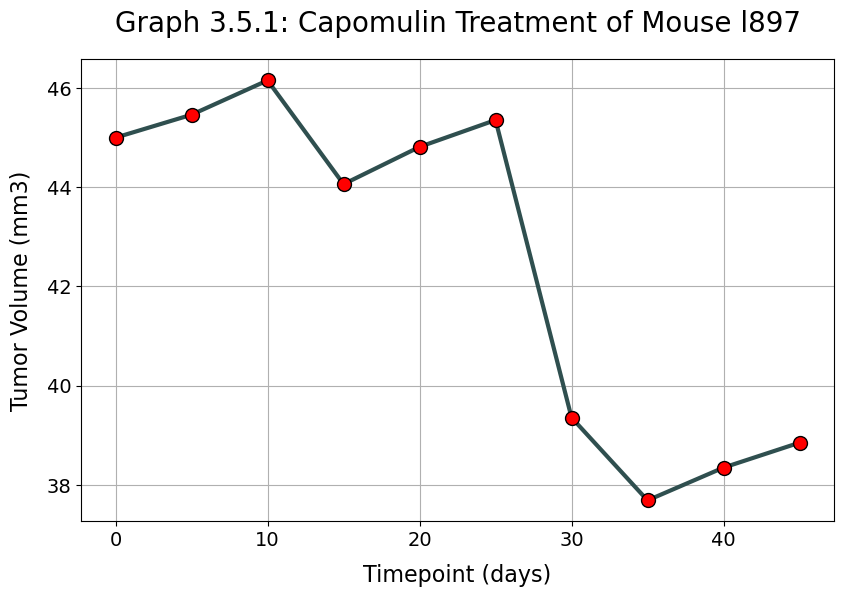

In [72]:
titleStringVariable \
    = f'Graph 3.5.1: Capomulin Treatment of Mouse {randomMouseIDCapomulinStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (capomulinXValuesSeries,
         capomulinYValuesSeries,
         'darkslategray',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

### **Display Line Plot (Ceftamin)**

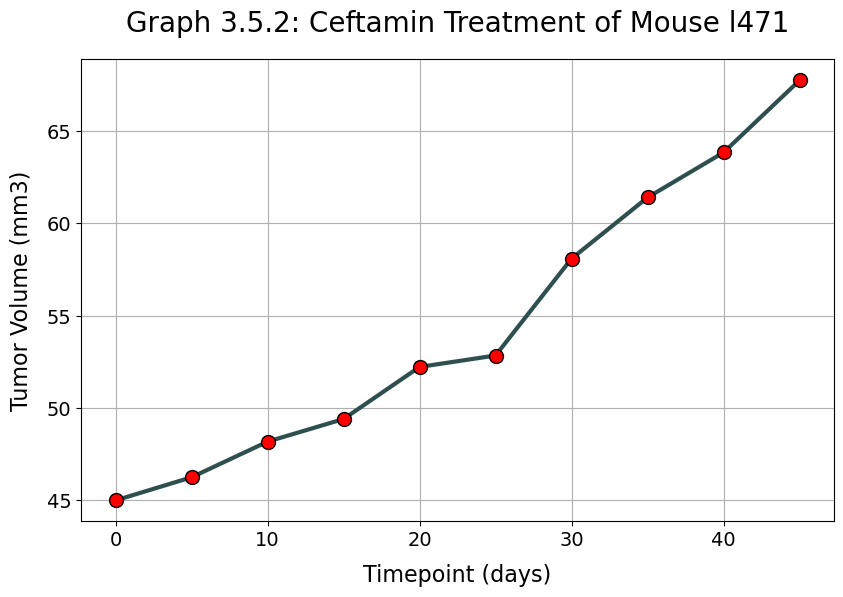

In [73]:
titleStringVariable \
    = f'Graph 3.5.2: Ceftamin Treatment of Mouse {randomMouseIDCeftaminStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (ceftaminXValuesSeries,
         ceftaminYValuesSeries,
         'darkslategray',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

### **Display Line Plot (Infubinol)**

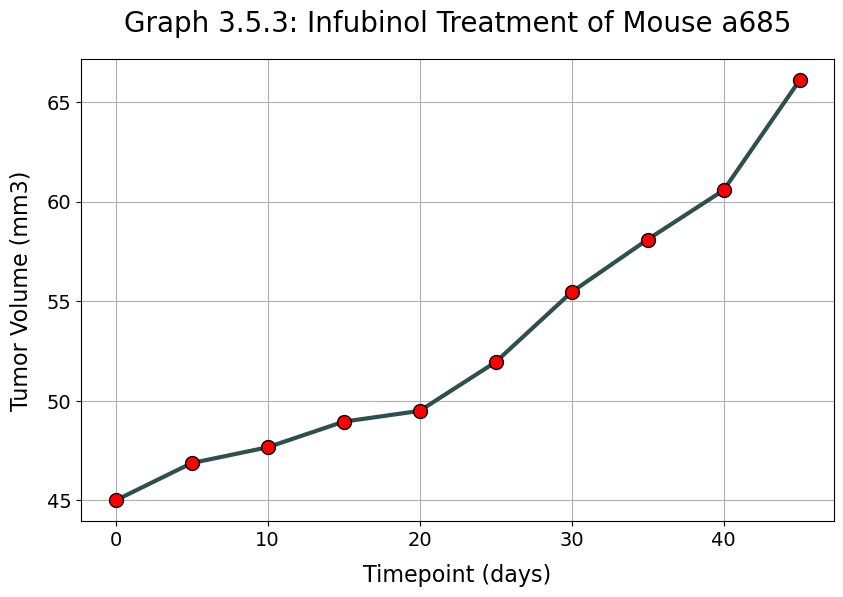

In [74]:
titleStringVariable \
    = f'Graph 3.5.3: Infubinol Treatment of Mouse {randomMouseIDInfubinolStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (infubinolXValuesSeries,
         infubinolYValuesSeries,
         'darkslategray',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

### **Display Line Plot (Ketapril)**

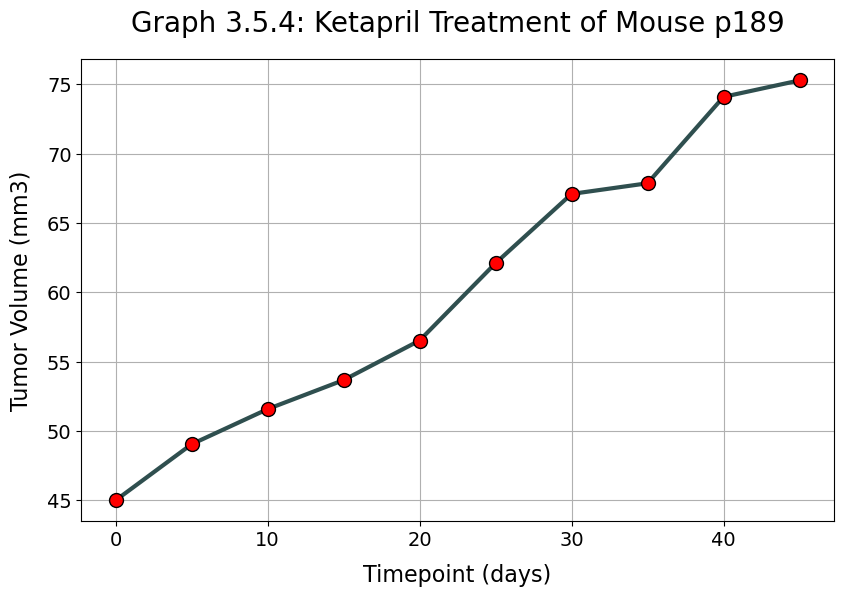

In [75]:
titleStringVariable \
    = f'Graph 3.5.4: Ketapril Treatment of Mouse {randomMouseIDKetaprilStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (ketaprilXValuesSeries,
         ketaprilYValuesSeries,
         'darkslategray',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

### **Display Line Plot (Naftisol)**

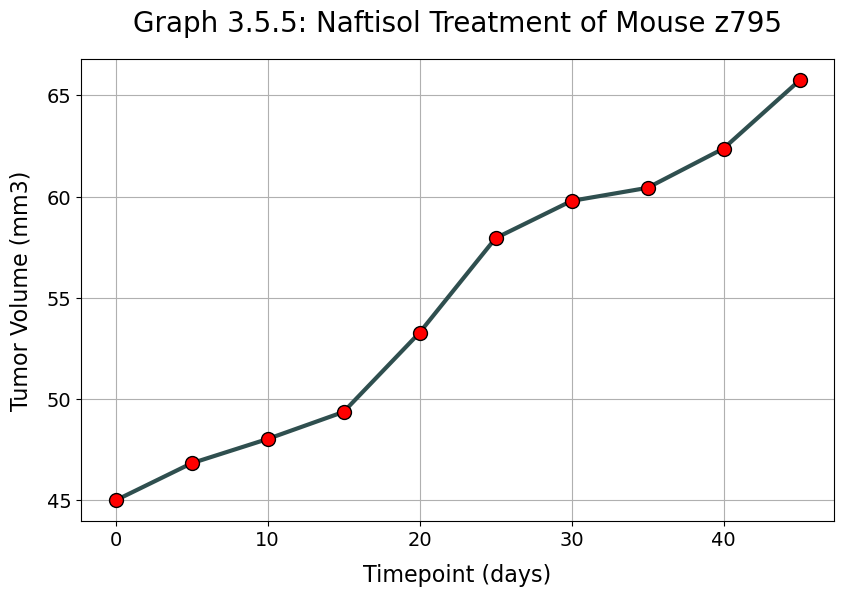

In [76]:
titleStringVariable \
    = f'Graph 3.5.5: Naftisol Treatment of Mouse {randomMouseIDNaftisolStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (naftisolXValuesSeries,
         naftisolYValuesSeries,
         'darkslategray',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

### **Display Line Plot (Placebo)**

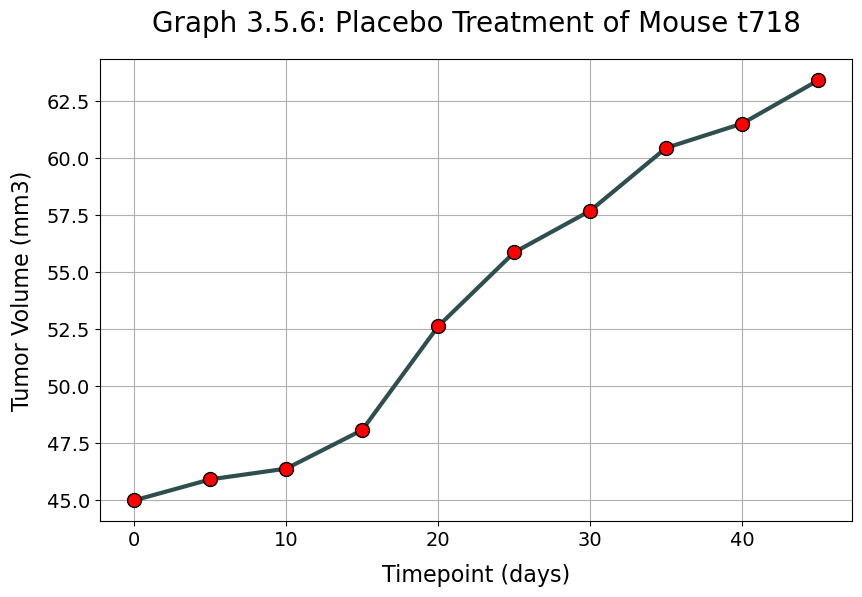

In [77]:
titleStringVariable \
    = f'Graph 3.5.6: Placebo Treatment of Mouse {randomMouseIDPlaceboStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (placeboXValuesSeries,
         placeboYValuesSeries,
         'darkslategray',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

### **Display Line Plot (Propriva)**

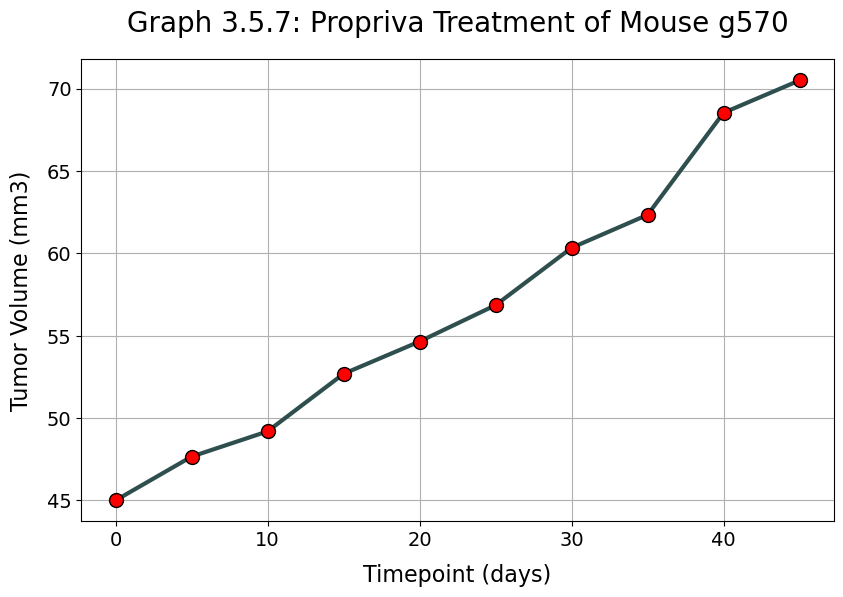

In [78]:
titleStringVariable \
    = f'Graph 3.5.7: Propriva Treatment of Mouse {randomMouseIDProprivaStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (proprivaXValuesSeries,
         proprivaYValuesSeries,
         'darkslategray',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

### **Display Line Plot (Ramicane)**

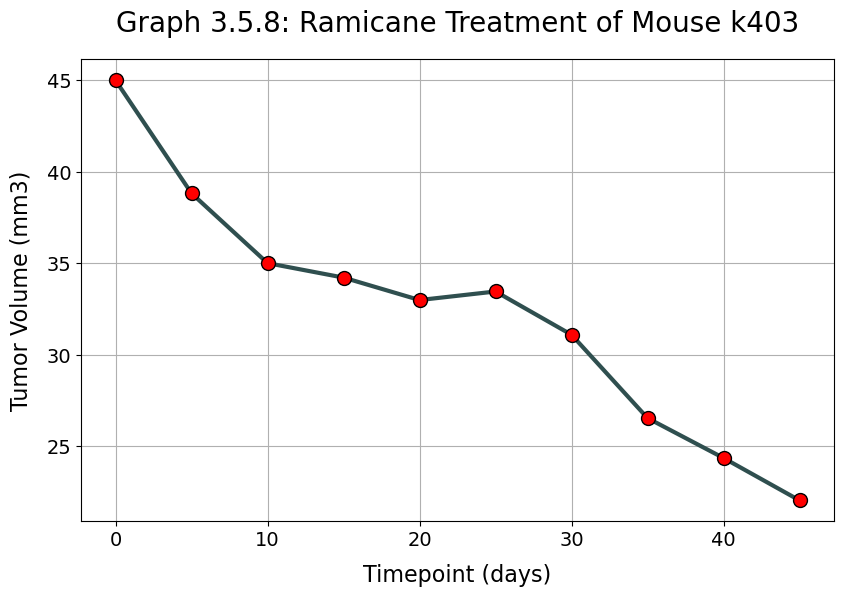

In [79]:
titleStringVariable \
    = f'Graph 3.5.8: Ramicane Treatment of Mouse {randomMouseIDRamicaneStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (ramicaneXValuesSeries,
         ramicaneYValuesSeries,
         'darkslategray',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

### **Display Line Plot (Stelasyn)**

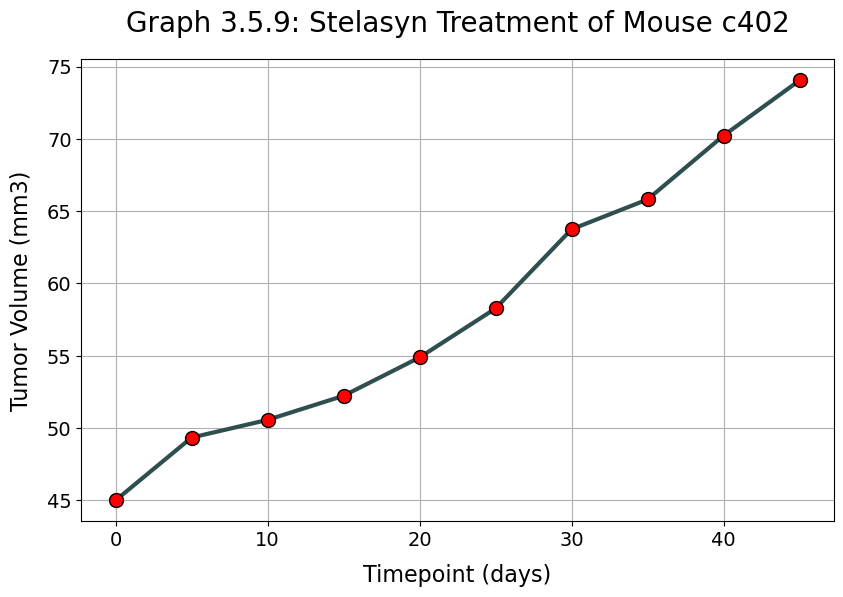

In [80]:
titleStringVariable \
    = f'Graph 3.5.9: Stelasyn Treatment of Mouse {randomMouseIDStelasynStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (stelasynXValuesSeries,
         stelasynYValuesSeries,
         'darkslategray',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

### **Display Line Plot (Zoniferol)**

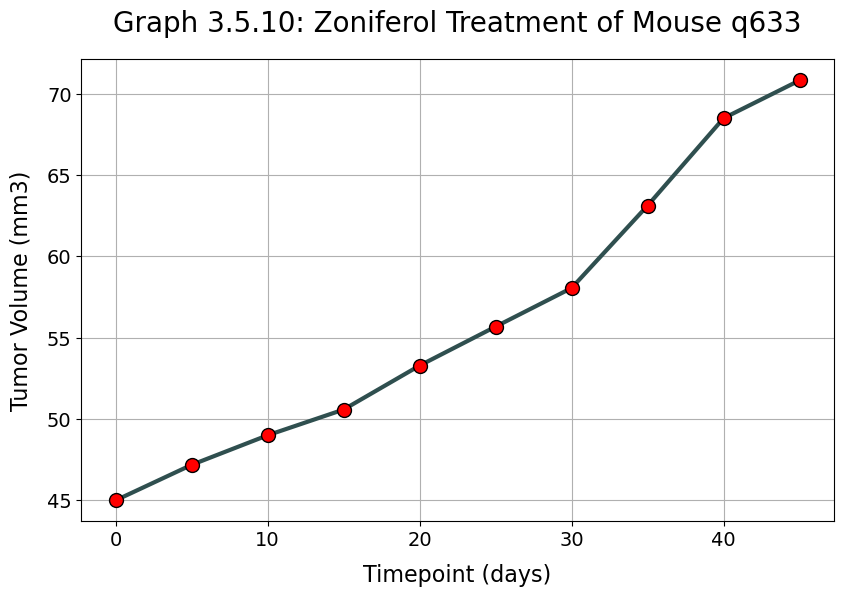

In [81]:
titleStringVariable \
    = f'Graph 3.5.10: Zoniferol Treatment of Mouse {randomMouseIDZoniferolStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (zoniferolXValuesSeries,
         zoniferolYValuesSeries,
         'darkslategray',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

# <br> **Section 4: Last Tumor Volume by Drug Regimen Statistics**

## **Section 4.1: Calculations**

### **Most Promising Drug Treatment Regimens**

In [82]:
# This line of code takes only rows for the four most promising treatment 
# regimens and placebos and assigns the data to a DataFrame.
promisingTreatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Capomulin')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Ramicane')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Infubinol')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Ceftamin')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Placebo'), :]

log_function \
    .DebugReturnObjectWriteObject \
        (promisingTreatmentRegimensDataFrame)

### **The Last (Greatest) Timepoint for Each Mouse (All)**

In [83]:
# This line of code uses groupby to group the rows by the last (greatest) timepoint 
# for each mouse ID, retrieves the maximum timepoint for each mouse, and resets 
# the DataFrame's index.
maximumTimepointPerMouseAllDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Timepoint'] \
        .max() \
        .reset_index()


log_function \
    .DebugReturnObjectWriteObject \
        (maximumTimepointPerMouseAllDataFrame)

### **New Merged DataFrame with Last Timepoints (All)**

In [84]:
mergedCompleteMedicalStudyAllDataFrame \
    = pd \
        .merge \
            (maximumTimepointPerMouseAllDataFrame,
             cleanCompleteMedicalStudyDataFrame, 
             on = ['Mouse ID',
                   'Timepoint'],
             how = 'left')


log_function \
    .DebugReturnObjectWriteObject \
        (mergedCompleteMedicalStudyAllDataFrame)

In [85]:
# In debug mode, these lines of code check if the mouse IDs in the merged
# complete medical study DataFrame are the same as those in the maximum 
# timepoint per mouse DataFrame.
if log_constant.DEBUG_FLAG == True:
    
    uniqueMouseIDsMergedStudyArray \
        = mergedCompleteMedicalStudyAllDataFrame \
            ['Mouse ID'] \
                .unique()
    
    uniqueMouseIDsMaximumTimePointArray \
        = maximumTimepointPerMouseAllDataFrame \
            ['Mouse ID'] \
                .unique()
    
    log_subroutine \
        .PrintAndLogWriteText \
            (str \
                 (np.array_equal \
                    (uniqueMouseIDsMergedStudyArray, 
                     uniqueMouseIDsMaximumTimePointArray)))

### **Drug Regimen List (All)**

In [86]:
allDrugRegimenNamesList \
    = cleanCompleteMedicalStudyDataFrame \
        ['Drug Regimen'] \
         .sort_values \
            (ascending = True) \
         .unique() \
         .tolist()

tumorVolumeAllSeriesList \
    = []


log_function \
    .DebugReturnObjectWriteObject \
        (allDrugRegimenNamesList)

### **Populate Tumor Volume List (All)**

In [87]:
# This for loop cycles through the List of drug regimens, extracts the 
# tumor volume for each regimen as a Series, and appends the series to 
# a List.
tumorVolumeAllSeriesList \
    = []

for regimenName in allDrugRegimenNamesList:

    regimenStudyDataFrame \
        = mergedCompleteMedicalStudyAllDataFrame \
            .loc \
                [(mergedCompleteMedicalStudyAllDataFrame \
                      ['Drug Regimen']
                  == regimenName), :]

    tumorVolumeAllSeriesList \
        .append \
            (regimenStudyDataFrame \
                 ['Tumor Volume (mm3)'])


log_function \
    .DebugReturnObjectWriteObject \
        (tumorVolumeAllSeriesList)

## **Section 4.2: Display Tumor Volume Statistics**

### **Display Tumor Volume Statistics (All)**

In [88]:
local_subroutine \
    .DisplayTumorVolumeStatistics \
        (allDrugRegimenNamesList, 
         tumorVolumeAllSeriesList,
         '4.2',
         'Tumor Volume')

Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
32.38,40.16,7.78,38.13,20.70,51.83,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
48.72,64.30,15.58,59.85,25.36,87.67,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
54.05,65.53,11.48,60.17,36.83,82.74,1


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
56.72,69.87,13.15,64.49,36.99,89.60,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
52.08,69.56,17.48,63.28,25.85,95.79,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
52.94,68.13,15.19,62.03,30.16,90.92,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
49.12,62.69,13.57,55.59,28.77,83.04,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
31.56,40.66,9.10,36.56,17.91,54.31,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
52.48,69.10,16.63,62.19,27.54,94.04,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
49.99,66.79,16.81,61.84,24.78,92.00,0


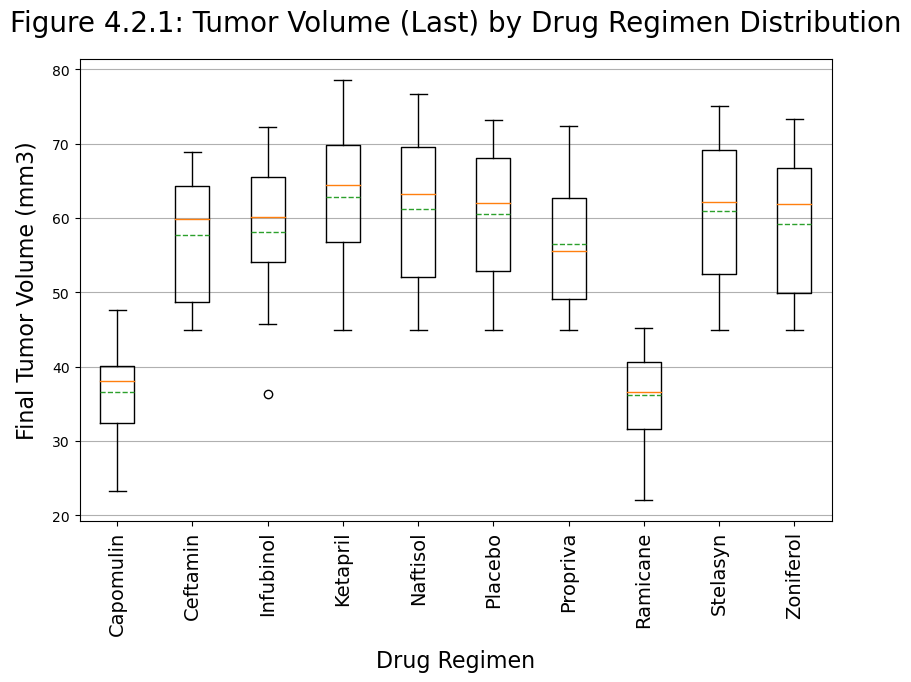

In [89]:
subroutine \
    .DisplayMatplotlibBoxPlotFromSeriesList \
        (tumorVolumeAllSeriesList,
         allDrugRegimenNamesList,
         'Drug Regimen',
         'Final Tumor Volume (mm3)',
         'Figure 4.2.1: Tumor Volume (Last) by Drug Regimen Distribution',
         xTicksRotationFloat = 90.0)

# <br> **Section 5: Last (Greatest) Timepoint  Statistics**

## **Section 5.1: Populate Last Timepoint List**

In [90]:
lastTimepointSeriesList \
    = []

for regimenName in allDrugRegimenNamesList:

    regimenStudyDataFrame \
        = mergedCompleteMedicalStudyAllDataFrame \
            .loc \
                [(mergedCompleteMedicalStudyAllDataFrame \
                      ['Drug Regimen']
                  == regimenName), :]

    lastTimepointSeriesList \
        .append \
            (regimenStudyDataFrame \
                 ['Timepoint'])


log_function \
    .DebugReturnObjectWriteObject \
        (lastTimepointSeriesList)

## **Section 5.2: Display Last (Greatest) Timepoint  Statistics**

In [91]:
local_subroutine \
    .DisplayTumorVolumeStatistics \
        (allDrugRegimenNamesList, 
         lastTimepointSeriesList,
         '5.2',
         'Last (Greatest) Timepoint')

Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
45.00,45.00,0.00,45.00,45.00,45.00,4


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
15.00,45.00,30.00,45.00,-30.00,90.00,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
20.00,45.00,25.00,30.00,-17.50,82.50,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
25.00,45.00,20.00,40.00,-5.00,75.00,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
20.00,45.00,25.00,45.00,-17.50,82.50,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
20.00,45.00,25.00,35.00,-17.50,82.50,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
10.00,45.00,35.00,27.50,-42.50,97.50,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
45.00,45.00,0.00,45.00,45.00,45.00,5


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
23.75,45.00,21.25,37.50,-8.12,76.88,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
15.00,45.00,30.00,45.00,-30.00,90.00,0


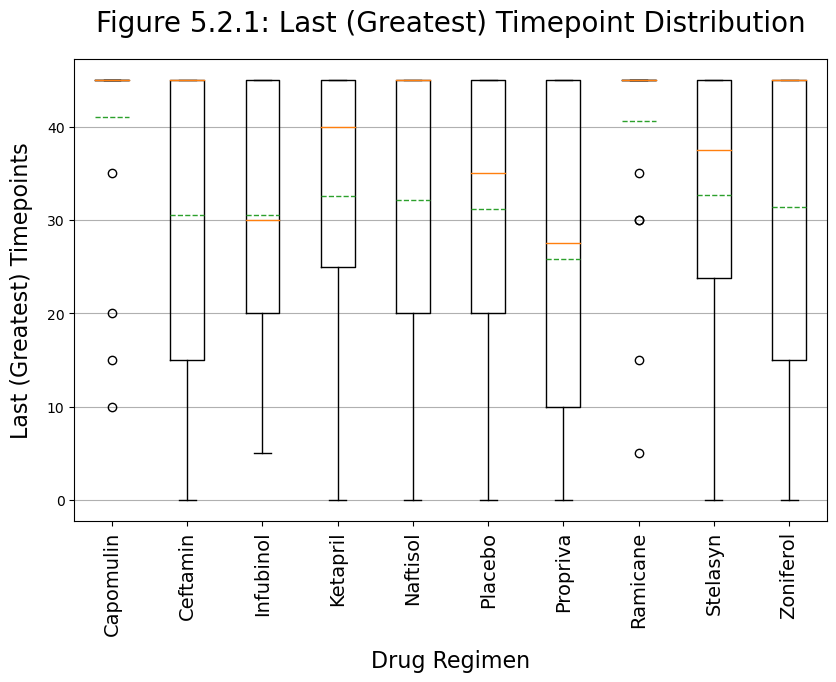

In [92]:
subroutine \
    .DisplayMatplotlibBoxPlotFromSeriesList \
        (lastTimepointSeriesList,
         allDrugRegimenNamesList,
         'Drug Regimen',
         'Last (Greatest) Timepoints',
         'Figure 5.2.1: Last (Greatest) Timepoint Distribution',
         xTicksRotationFloat = 90.0)

# <br> **Section 6: Data Points Per Mouse Analysis**

## **Section 6.1: Mouse Data Points by Drug Regimen**

### **Calculate Number of Observed Observatons**

In [93]:
countByDrugRegimenSeries \
    = cleanCompleteMedicalStudyDataFrame \
        ['Drug Regimen'] \
            .value_counts()


log_function \
    .DebugReturnObjectWriteObject \
        (countByDrugRegimenSeries)

### **Display Observed Mouse Timepoints by Drug Regimen**

In [94]:
barColorsList \
    = ['darkorange',
       'darkorange', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen', 
       'darkgreen']

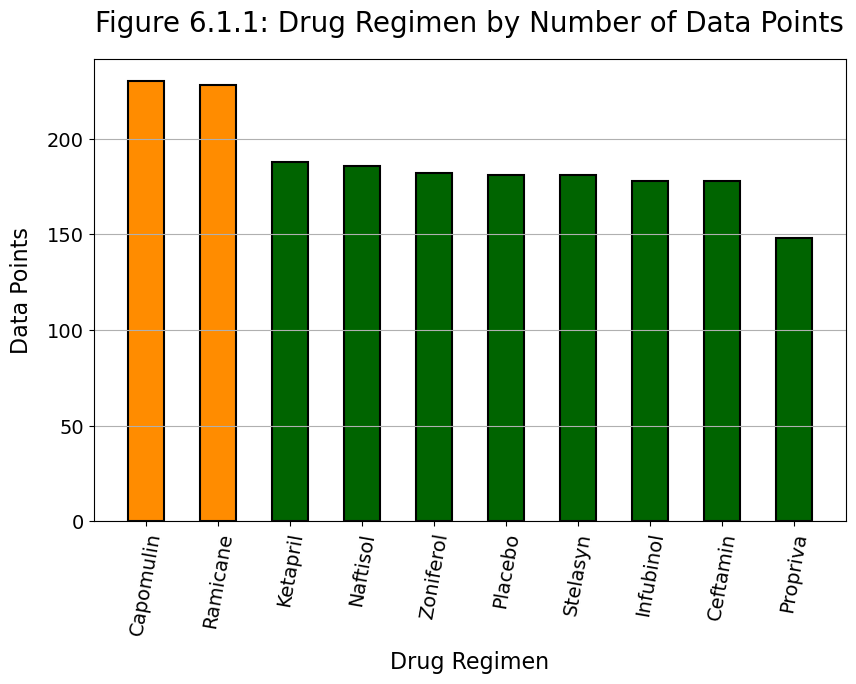

In [95]:
subroutine \
    .DisplayMatplotlibBarChartFromSeries \
        (countByDrugRegimenSeries, 
         barColorsList,
         'Figure 6.1.1: Drug Regimen by Number of Data Points',
         'Data Points')

## **Section 6.2: Infubinol Statistical Outlier**

### **Display Infubinol Statistical Outlier**

In [96]:
infubinolOutlierDataFrame \
    = mergedCompleteMedicalStudyAllDataFrame \
        .loc \
            [(mergedCompleteMedicalStudyAllDataFrame \
                  ['Drug Regimen'] \
                      == 'Infubinol') \
             & (mergedCompleteMedicalStudyAllDataFrame \
                    ['Tumor Volume (mm3)'] \
                        < 40.0), :]


log_function \
    .DebugReturnObjectWriteObject \
        (infubinolOutlierDataFrame)

In [97]:
captionString \
    = 'Table 6.2.1: Infubinol Statistical Outlier'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (infubinolOutlierDataFrame, 
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
c326,5,Infubinol,Female,18,25,36.32,0


### **Display Statistical Outlier Mouse Records**

In [98]:
infubinolOutlierMouseDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [cleanCompleteMedicalStudyDataFrame \
                ['Mouse ID'] \
             == 'c326', :]


log_function \
    .DebugReturnObjectWriteObject \
        (infubinolOutlierMouseDataFrame)

In [99]:
captionString \
    = 'Table 6.2.2: Statistical Outlier Mouse Records'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (infubinolOutlierMouseDataFrame, 
             captionString)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
c326,Infubinol,Female,18,25,0,45.00,0
c326,Infubinol,Female,18,25,5,36.32,0


## **Section 6.3: Range of Data Points per Mouse**

### **Calculation**

In [100]:
minimumNumberOfDataPointsPerMouseIntegerVariable \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Drug Regimen'] \
        .count() \
        .min()


log_function \
    .DebugReturnObjectWriteObject \
        (minimumNumberOfDataPointsPerMouseIntegerVariable)

In [101]:
maximumNumberOfDataPointsPerMouseIntegerVariable \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Drug Regimen'] \
        .count() \
        .max()


log_function \
    .DebugReturnObjectWriteObject \
        (maximumNumberOfDataPointsPerMouseIntegerVariable)

### **Display Range of Data Points per Mouse**

In [102]:
log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'The range of data points per mouse is ' \
         + '{:,}' \
                .format \
                    (minimumNumberOfDataPointsPerMouseIntegerVariable)
         + '-{:,}.' \
                .format \
                    (maximumNumberOfDataPointsPerMouseIntegerVariable) \
         + '\033[0m')

The range of data points per mouse is 1-10.


## **Section 6.4: Drug Treatment Regimen by Data Points Per Mouse**

### **Mouse ID by Number of Data Points**

In [103]:
mouseIDbyDataPointsSeries \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Mouse ID')\
                ['Drug Regimen'] \
        .count()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDbyDataPointsSeries)

In [104]:
mouseIDByDataPointDataFrame \
    = pd.DataFrame \
        (mouseIDbyDataPointsSeries)

mouseIDByDataPointDataFrame \
    .rename \
        (columns = {'Drug Regimen': 
                    'Data Points'},
         inplace = True)

### **Display Mouse ID by Number of Data Points**

In [105]:
captionString \
    = 'Table 6.4.1: Mouse ID by Number of Data Points'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (mouseIDByDataPointDataFrame.head(12), 
             captionString,
             hideFlagBooleanParameter = False)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,Data Points
Mouse ID,
a203,10
a251,10
a262,10
a275,10
a366,7
a401,10
a411,10
a444,10
a457,3


### **Mouse ID Lists**

In [106]:
mouseIDsOneToThreeList \
    = mouseIDbyDataPointsSeries \
        [(mouseIDbyDataPointsSeries >= 1) \
         & (mouseIDbyDataPointsSeries <= 3)] \
            .index \
            .tolist()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsOneToThreeList)

In [107]:
mouseIDsFourToSixList \
    = mouseIDbyDataPointsSeries \
        [(mouseIDbyDataPointsSeries >= 4) \
         & (mouseIDbyDataPointsSeries <= 6)] \
            .index \
            .tolist()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsFourToSixList)

In [108]:
mouseIDsSevenToNineList \
    = mouseIDbyDataPointsSeries \
        [(mouseIDbyDataPointsSeries >= 7) \
         & (mouseIDbyDataPointsSeries <= 9)] \
            .index \
            .tolist()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsSevenToNineList)

In [109]:
mouseIDsTenList \
    = mouseIDbyDataPointsSeries \
        [mouseIDbyDataPointsSeries == 10] \
            .index \
            .tolist()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsTenList)

### **Medical Study Information Based on Data Point Count per Mouse**

In [110]:
mouseIDsOneToThreeCompleteMedicalStudyDataFrame \
    = function \
        .ReturnDataFrameRowsWithValue \
            (cleanCompleteMedicalStudyDataFrame, 
             'Mouse ID', 
             mouseIDsOneToThreeList)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsOneToThreeCompleteMedicalStudyDataFrame)

In [111]:
mouseIDsFourToSixCompleteMedicalStudyDataFrame \
    = function \
        .ReturnDataFrameRowsWithValue \
            (cleanCompleteMedicalStudyDataFrame, 
             'Mouse ID', 
             mouseIDsFourToSixList)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsFourToSixCompleteMedicalStudyDataFrame)

In [112]:
mouseIDsSevenToNineCompleteMedicalStudyDataFrame \
    = function \
        .ReturnDataFrameRowsWithValue \
            (cleanCompleteMedicalStudyDataFrame, 
             'Mouse ID', 
             mouseIDsSevenToNineList)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsSevenToNineCompleteMedicalStudyDataFrame)

In [113]:
mouseIDsTenCompleteMedicalStudyDataFrame \
    = function \
        .ReturnDataFrameRowsWithValue \
            (cleanCompleteMedicalStudyDataFrame, 
             'Mouse ID', 
             mouseIDsTenList)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDsTenCompleteMedicalStudyDataFrame)

### **Mouse ID/Drug Regimen Information**

In [114]:
mouseIDDrugRegimenOneToThreeDataFrame \
    = mouseIDsOneToThreeCompleteMedicalStudyDataFrame \
        .groupby \
            (['Mouse ID',
              'Drug Regimen']) \
        .size() \
        .reset_index()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDDrugRegimenOneToThreeDataFrame)

In [115]:
mouseIDDrugRegimenFourToSixDataFrame \
    = mouseIDsFourToSixCompleteMedicalStudyDataFrame \
        .groupby \
            (['Mouse ID',
              'Drug Regimen']) \
        .size() \
        .reset_index()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDDrugRegimenFourToSixDataFrame)

In [116]:
mouseIDDrugRegimenSevenToNineDataFrame \
    = mouseIDsSevenToNineCompleteMedicalStudyDataFrame \
        .groupby \
            (['Mouse ID',
              'Drug Regimen']) \
        .size() \
        .reset_index()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDDrugRegimenSevenToNineDataFrame)

In [117]:
mouseIDDrugRegimenTenDataFrame \
    = mouseIDsTenCompleteMedicalStudyDataFrame \
        .groupby \
            (['Mouse ID',
              'Drug Regimen']) \
        .size() \
        .reset_index()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseIDDrugRegimenTenDataFrame)

### **Number of Mice Vs. Drug Treatment Regimen**

In [118]:
miceOneToThreeVsRegimenSeries \
    = mouseIDDrugRegimenOneToThreeDataFrame \
        .groupby \
            ('Drug Regimen') \
                ['Mouse ID'] \
        .count()

miceOneToThreeVsRegimenSeries \
    .name \
        = '1-3 Data Points'


log_function \
    .DebugReturnObjectWriteObject \
        (miceOneToThreeVsRegimenSeries)

In [119]:
miceFourToSixVsRegimenSeries \
    = mouseIDDrugRegimenFourToSixDataFrame \
        .groupby \
            ('Drug Regimen') \
                ['Mouse ID'] \
        .count()

miceFourToSixVsRegimenSeries \
    .name \
        = '4-6 Data Points'


log_function \
    .DebugReturnObjectWriteObject \
        (miceFourToSixVsRegimenSeries)

In [120]:
miceSevenToNineVsRegimenSeries \
    = mouseIDDrugRegimenSevenToNineDataFrame \
        .groupby \
            ('Drug Regimen') \
                ['Mouse ID'] \
        .count()

miceSevenToNineVsRegimenSeries \
    .name \
        = '7-9 Data Points'


log_function \
    .DebugReturnObjectWriteObject \
        (miceSevenToNineVsRegimenSeries)

In [121]:
miceTenVsRegimenSeries \
    = mouseIDDrugRegimenTenDataFrame \
        .groupby \
            ('Drug Regimen') \
                ['Mouse ID'] \
        .count()

miceTenVsRegimenSeries \
    .name \
        = '10 Data Points'


log_function \
    .DebugReturnObjectWriteObject \
        (miceTenVsRegimenSeries)

### **Drug Treatment Regimen by Data Points Per Mouse**

In [122]:
mouseCountVsDrugRegimenDataFrame \
    = pd \
        .concat \
            ([miceTenVsRegimenSeries, 
              miceSevenToNineVsRegimenSeries,
              miceFourToSixVsRegimenSeries,
              miceOneToThreeVsRegimenSeries], 
             axis = 1)


log_function \
    .DebugReturnObjectWriteObject \
        (mouseCountVsDrugRegimenDataFrame)

### **Display Drug Treatment Regimen by Data Points Per Mouse**

In [123]:
captionString \
    = 'Table 6.4.2: Drug Treatment Regimen by Data Point Category (Number of Mice)'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (mouseCountVsDrugRegimenDataFrame,
             captionString,
             0, False)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,10 Data Points,7-9 Data Points,4-6 Data Points,1-3 Data Points
Drug Regimen,,,,
Capomulin,21,1,2,1
Ceftamin,13,3,3,6
Infubinol,9,8,4,4
Ketapril,11,7,1,6
Naftisol,13,2,6,4
Placebo,11,4,5,5
Propriva,7,5,3,9
Ramicane,20,3,1,1
Stelasyn,11,6,4,3


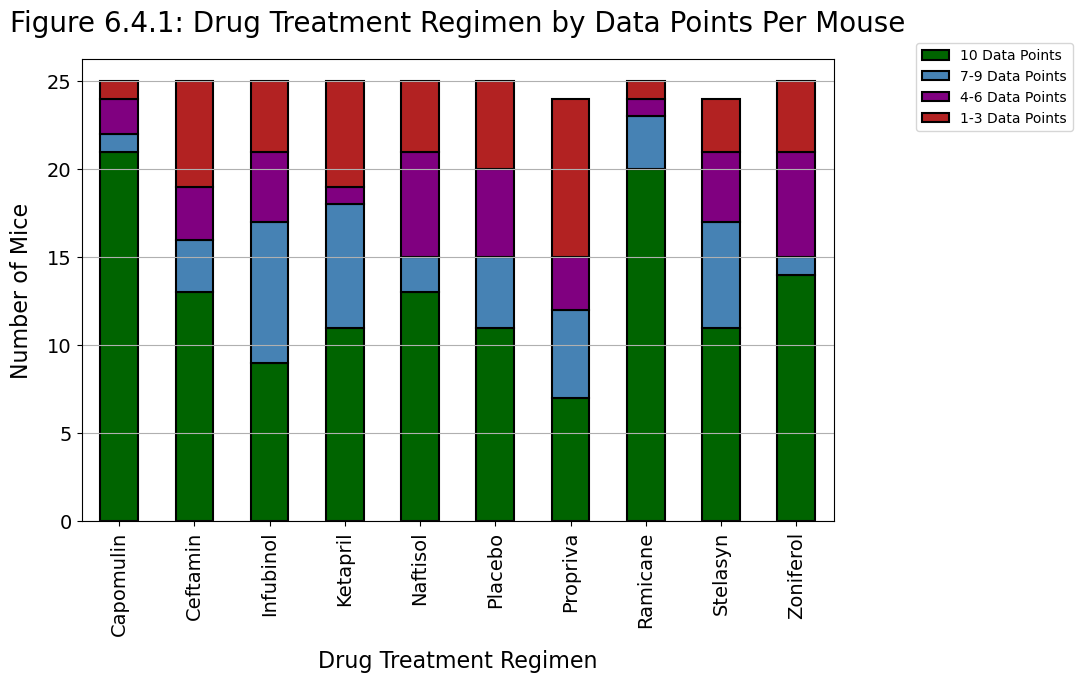

In [124]:
subroutine \
    .DisplayStackedBarChartFromDataFrame \
        (mouseCountVsDrugRegimenDataFrame,
         'Figure 6.4.1: Drug Treatment Regimen by Data Points Per Mouse',
         'Drug Treatment Regimen',
         'Number of Mice')

## **Section 6.5: Percentage of Missing Data Points**

### **Number of Expected Data Points**

In [125]:
numberOfTreatmentRegimensIntegerVariable = 10

expectedNumberOfMicePerTreatmentRegimenIntegerVariable = 25

expectedNumberOfDataPointsPerMouseIntegerVariable = 10


expectedTotalNumberOfDataPointsIntegerVariable \
    = numberOfTreatmentRegimensIntegerVariable \
        * expectedNumberOfMicePerTreatmentRegimenIntegerVariable \
        * expectedNumberOfDataPointsPerMouseIntegerVariable
    
    
log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'There should be {:,} ' \
             .format \
                 (expectedTotalNumberOfDataPointsIntegerVariable)
         + 'data points in this animal study.' \
         + '\033[0m')

There should be 2,500 data points in this animal study.


### **Number of Actual Data Points**

In [126]:
currentTotalNumberOfDataPointsIntegerVariable \
    = cleanCompleteMedicalStudyDataFrame['Mouse ID'] \
        .count()

log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'There are {:,} data points ' \
             .format \
                 (currentTotalNumberOfDataPointsIntegerVariable)
         + 'in this animal study.' \
         + '\033[0m')

There are 1,880 data points in this animal study.


### **Display Percentage of Missing Data Points**

In [127]:
numberOfMissingDataPointsIntegerVariable \
    = expectedTotalNumberOfDataPointsIntegerVariable \
        - currentTotalNumberOfDataPointsIntegerVariable

percentageOfMissingDataPointsFloatVariable \
    = (numberOfMissingDataPointsIntegerVariable \
       / expectedTotalNumberOfDataPointsIntegerVariable) \
      * 100


log_subroutine \
    .PrintAndLogWriteText \
        ('\033[1m' \
         + 'This animal study is missing {:,} data points ' \
             .format \
                 (numberOfMissingDataPointsIntegerVariable)
         + 'or {:,.1f}% of the expected total.' \
                .format \
                    (percentageOfMissingDataPointsFloatVariable) \
         + '\033[0m')

This animal study is missing 620 data points or 24.8% of the expected total.


# **Section 7: Tumor Volumes vs. Mouse Weights by Drug Regimen**

## **Section 7.1: Tumor Volumes (Median) By Drug Regimen**

### **Tumor Volumes (Median) By Drug Regimen (Capomulin)**

In [128]:
capomulinMedianTumorVolumePerMouseSeries \
    = capomulinStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinMedianTumorVolumePerMouseSeries)

### **Tumor Volumes (Median) By Drug Regimen (Ceftamin)**

In [129]:
ceftaminMedianTumorVolumePerMouseSeries \
    = ceftaminStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (ceftaminMedianTumorVolumePerMouseSeries)

### **Tumor Volumes (Median) By Drug Regimen (Infubinol)**

In [130]:
infubinolMedianTumorVolumePerMouseSeries \
    = infubinolStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (infubinolMedianTumorVolumePerMouseSeries)

### **Tumor Volumes (Median) By Drug Regimen (Ketapril)**

In [131]:
ketaprilMedianTumorVolumePerMouseSeries \
    = ketaprilStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (ketaprilMedianTumorVolumePerMouseSeries)

### **Tumor Volumes (Median) By Drug Regimen (Naftisol)**

In [132]:
naftisolMedianTumorVolumePerMouseSeries \
    = naftisolStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (naftisolMedianTumorVolumePerMouseSeries)

### **Tumor Volumes (Median) By Drug Regimen (Placebo)**

In [133]:
placeboMedianTumorVolumePerMouseSeries \
    = placeboStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (placeboMedianTumorVolumePerMouseSeries)

### **Tumor Volumes (Median) By Drug Regimen (Propriva)**

In [134]:
proprivaMedianTumorVolumePerMouseSeries \
    = proprivaStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (proprivaMedianTumorVolumePerMouseSeries)

### **Tumor Volumes (Median) By Drug Regimen (Ramicane)**

In [135]:
ramicaneMedianTumorVolumePerMouseSeries \
    = ramicaneStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (ramicaneMedianTumorVolumePerMouseSeries)

### **Tumor Volumes (Median) By Drug Regimen (Stelasyn)**

In [136]:
stelasynMedianTumorVolumePerMouseSeries \
    = stelasynStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (stelasynMedianTumorVolumePerMouseSeries)

### **Tumor Volumes (Median) By Drug Regimen (Zoniferol)**

In [137]:
zoniferolMedianTumorVolumePerMouseSeries \
    = zoniferolStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (stelasynMedianTumorVolumePerMouseSeries)

## **Section 7.2: Mouse Weights (Median) by Drug Regimen**

### **Mouse Weights (Median) by Drug Regimen (Capomulin)**

In [138]:
capomulinMedianWeightPerMouseSeries \
    = capomulinStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinMedianWeightPerMouseSeries)

### **Mouse Weights (Median) by Drug Regimen (Ceftamin)**

In [139]:
ceftaminMedianWeightPerMouseSeries \
    = ceftaminStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (ceftaminMedianWeightPerMouseSeries)

### **Mouse Weights (Median) by Drug Regimen (Infubinol)**

In [140]:
infubinolMedianWeightPerMouseSeries \
    = infubinolStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (infubinolMedianWeightPerMouseSeries)

### **Mouse Weights (Median) by Drug Regimen (Ketapril)**

In [141]:
ketaprilMedianWeightPerMouseSeries \
    = ketaprilStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (ketaprilMedianWeightPerMouseSeries)

### **Mouse Weights (Median) by Drug Regimen (Naftisol)**

In [142]:
naftisolMedianWeightPerMouseSeries \
    = naftisolStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (naftisolMedianWeightPerMouseSeries)

### **Mouse Weights (Median) by Drug Regimen (Placebo)**

In [143]:
placeboMedianWeightPerMouseSeries \
    = placeboStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (placeboMedianWeightPerMouseSeries)

### **Mouse Weights (Median) by Drug Regimen (Propriva)**

In [144]:
proprivaMedianWeightPerMouseSeries \
    = proprivaStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (proprivaMedianWeightPerMouseSeries)

### **Mouse Weights (Median) by Drug Regimen (Ramicane)**

In [145]:
ramicaneMedianWeightPerMouseSeries \
    = ramicaneStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (ramicaneMedianWeightPerMouseSeries)

### **Mouse Weights (Median) by Drug Regimen (Stelasyn)**

In [146]:
stelasynMedianWeightPerMouseSeries \
    = stelasynStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (stelasynMedianWeightPerMouseSeries)

### **Mouse Weights (Median) by Drug Regimen (Zoniferol)**

In [147]:
zoniferolMedianWeightPerMouseSeries \
    = zoniferolStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (zoniferolMedianWeightPerMouseSeries)

## **Section 7.3: Display Tumor Volumes vs. Mouse Weights With Regression**

### **Display Tumor Volumes vs. Mouse Weights With Regression (Capomulin)**

r-value:     0.7669
r-squared:   0.5881



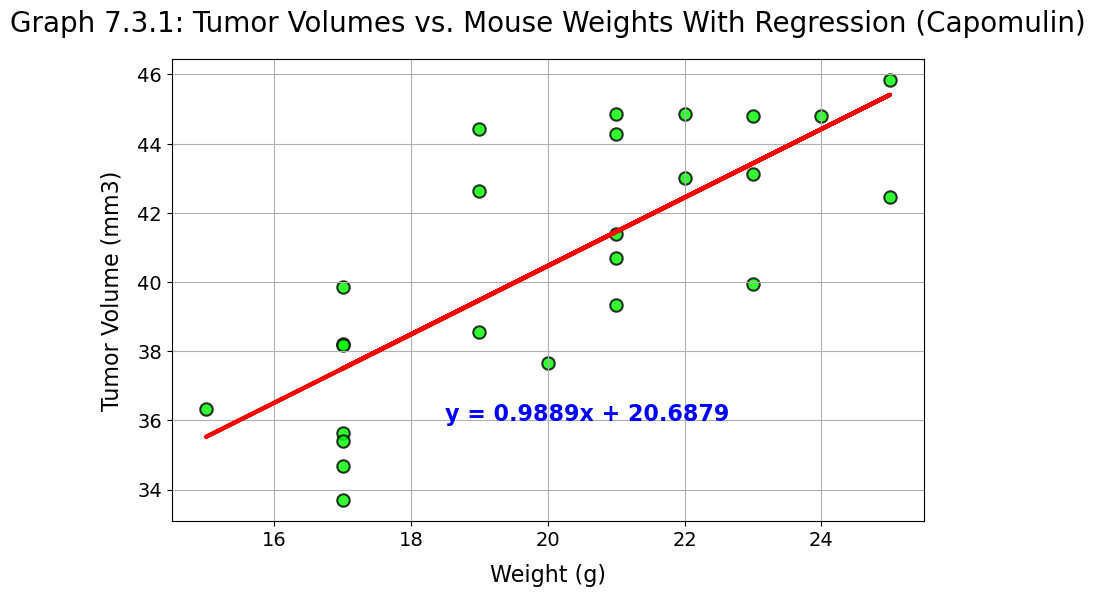

In [148]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (capomulinMedianWeightPerMouseSeries, 
         capomulinMedianTumorVolumePerMouseSeries, 
         'Graph 7.3.1: Tumor Volumes vs. Mouse Weights With Regression (Capomulin)',
         1, 18.5, 36)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Ceftamin)**

r-value:     0.0081
r-squared:   0.0001



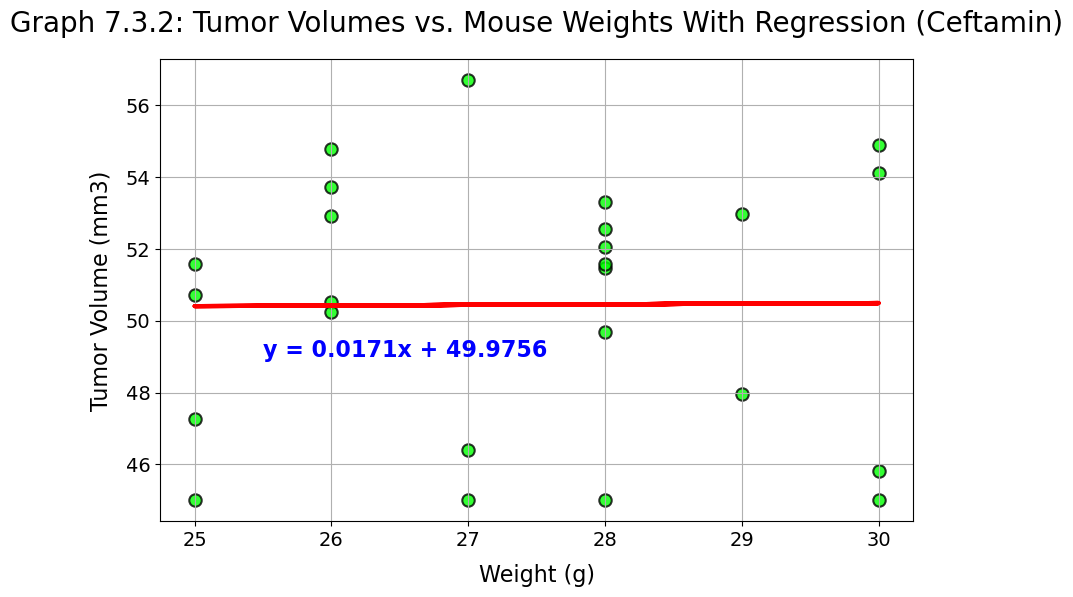

In [149]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (ceftaminMedianWeightPerMouseSeries, 
         ceftaminMedianTumorVolumePerMouseSeries, 
         'Graph 7.3.2: Tumor Volumes vs. Mouse Weights With Regression (Ceftamin)',
         1, 25.5, 49)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Infubinol)**

r-value:     -0.0681
r-squared:   0.0046



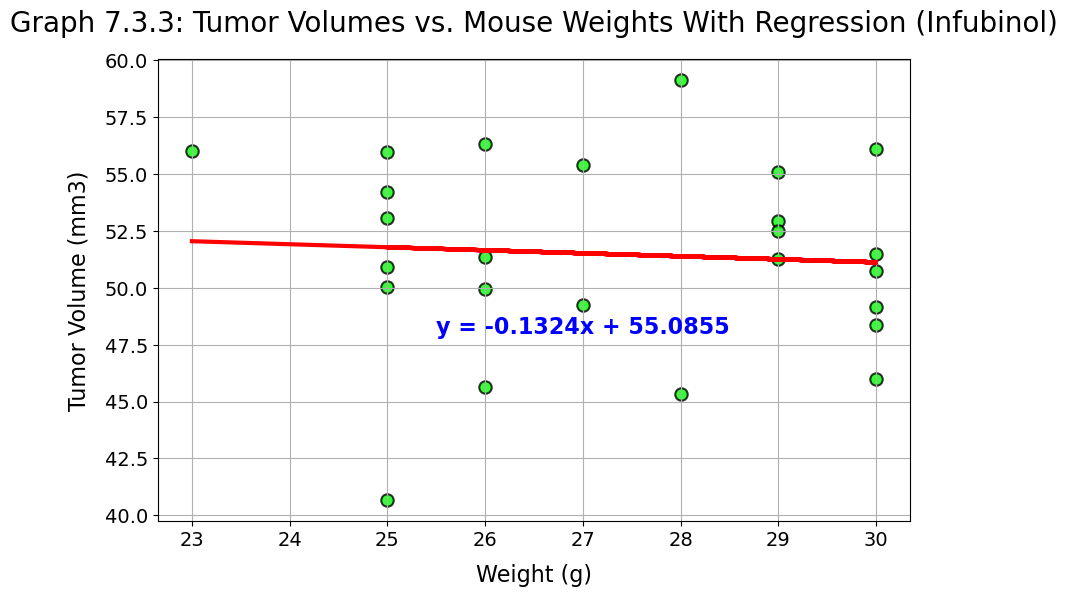

In [150]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (infubinolMedianWeightPerMouseSeries, 
         infubinolMedianTumorVolumePerMouseSeries, 
         'Graph 7.3.3: Tumor Volumes vs. Mouse Weights With Regression (Infubinol)',
         1, 25.5, 48.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Ketapril)**

r-value:     -0.0055
r-squared:   0.0000



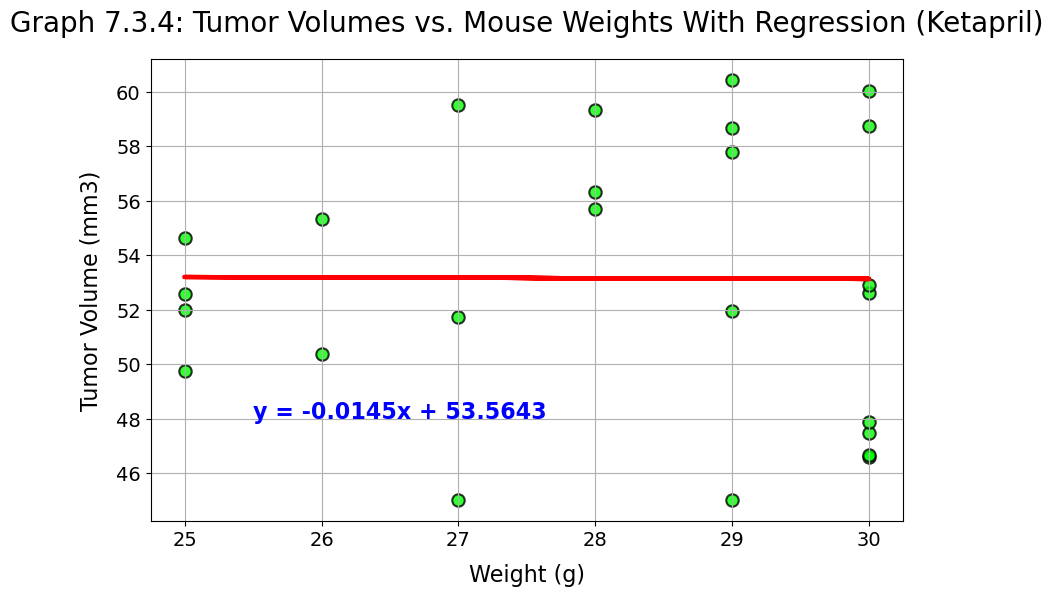

In [151]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (ketaprilMedianWeightPerMouseSeries, 
         ketaprilMedianTumorVolumePerMouseSeries, 
         'Graph 7.3.4: Tumor Volumes vs. Mouse Weights With Regression (Ketapril)',
         1, 25.5, 48.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Naftisol)**

r-value:     -0.1309
r-squared:   0.0171



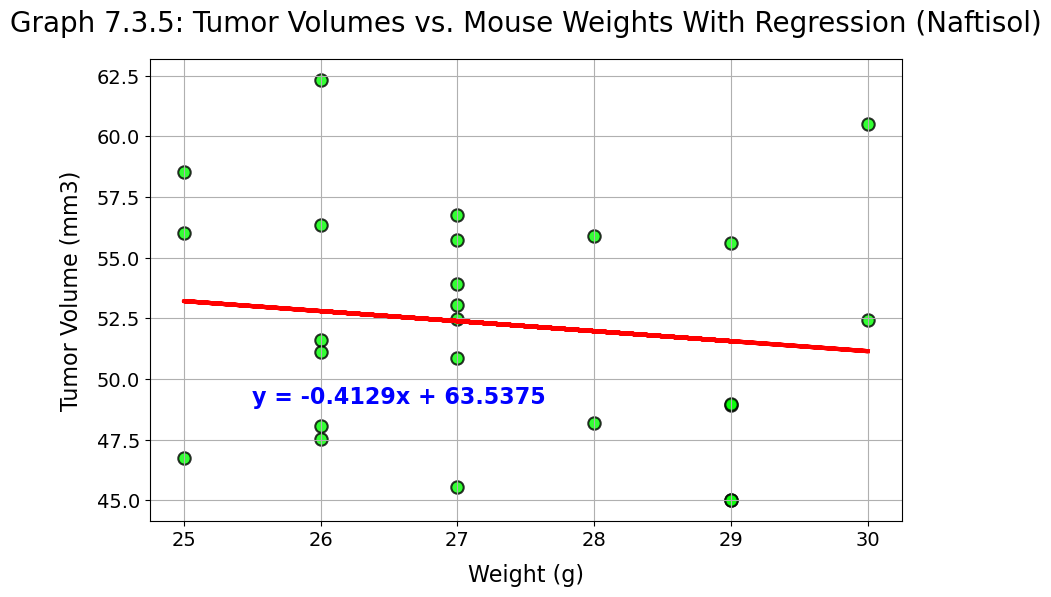

In [152]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (naftisolMedianWeightPerMouseSeries, 
         naftisolMedianTumorVolumePerMouseSeries, 
         'Graph 7.3.5: Tumor Volumes vs. Mouse Weights With Regression (Naftisol)',
         1, 25.5, 49.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Placebo)**

r-value:     -0.1195
r-squared:   0.0143



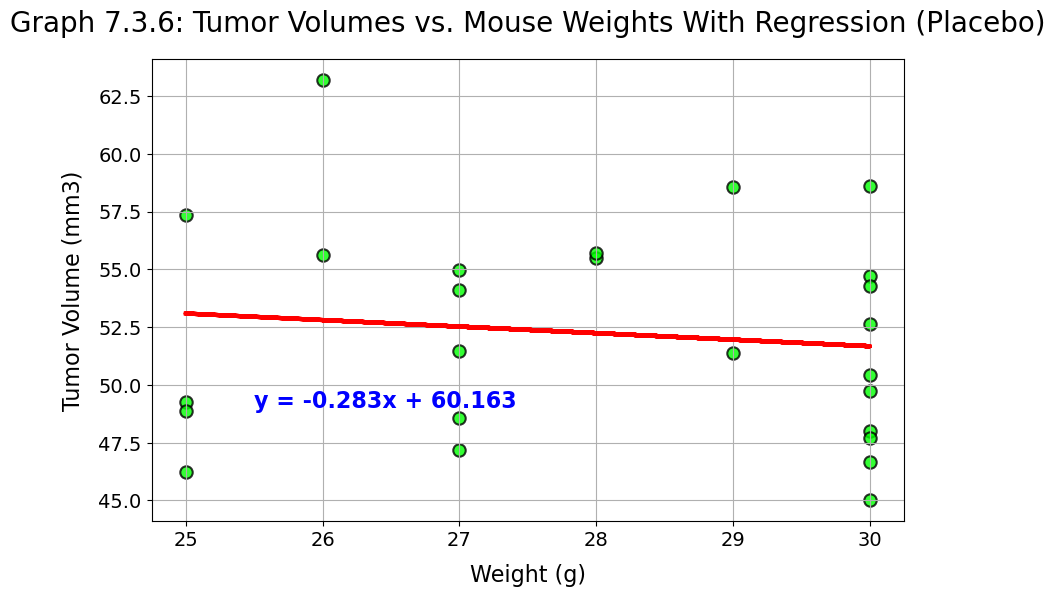

In [153]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (placeboMedianWeightPerMouseSeries, 
         placeboMedianTumorVolumePerMouseSeries, 
         'Graph 7.3.6: Tumor Volumes vs. Mouse Weights With Regression (Placebo)',
         1, 25.5, 49.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Propriva)**

r-value:     -0.0030
r-squared:   0.0000



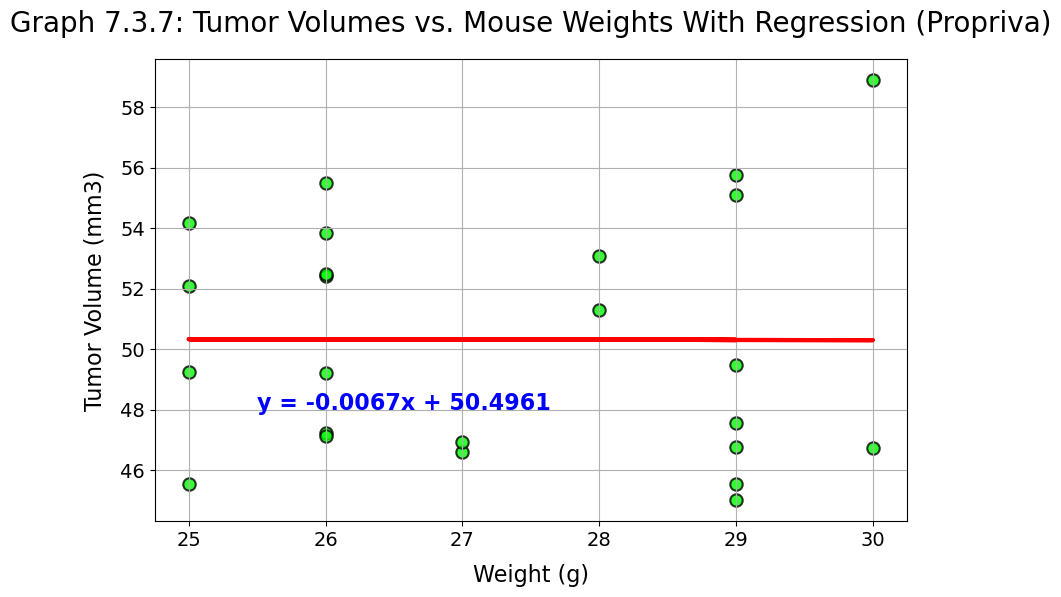

In [154]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (proprivaMedianWeightPerMouseSeries, 
         proprivaMedianTumorVolumePerMouseSeries, 
         'Graph 7.3.7: Tumor Volumes vs. Mouse Weights With Regression (Propriva)',
         1, 25.5, 48.0)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Ramicane)**

r-value:     0.6917
r-squared:   0.4784



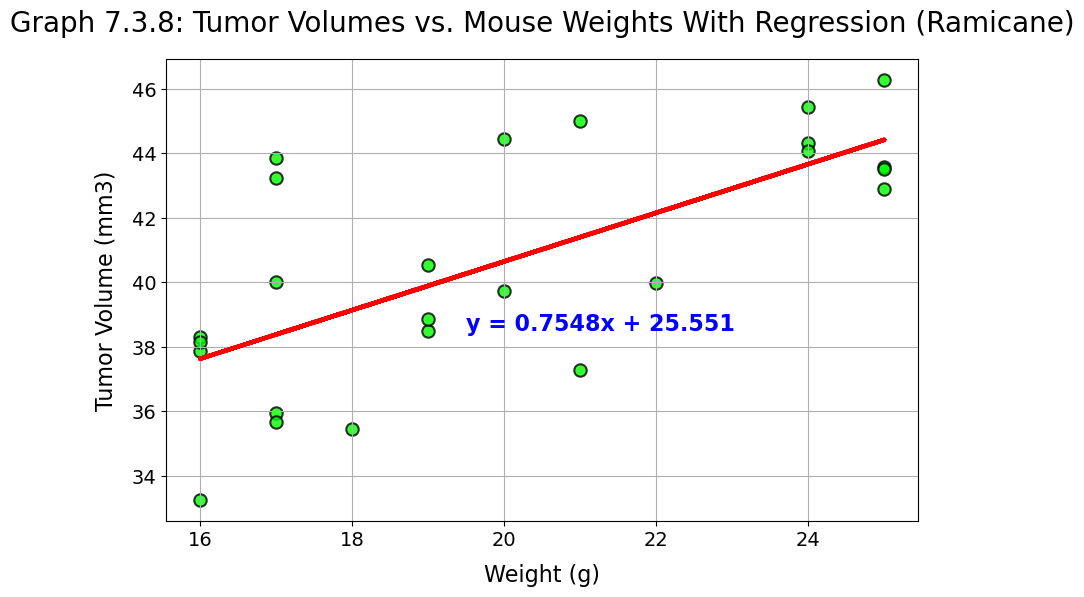

In [155]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (ramicaneMedianWeightPerMouseSeries, 
         ramicaneMedianTumorVolumePerMouseSeries, 
         'Graph 7.3.8: Tumor Volumes vs. Mouse Weights With Regression (Ramicane)',
         1, 19.5, 38.5)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Stelasyn)**

r-value:     0.0623
r-squared:   0.0039



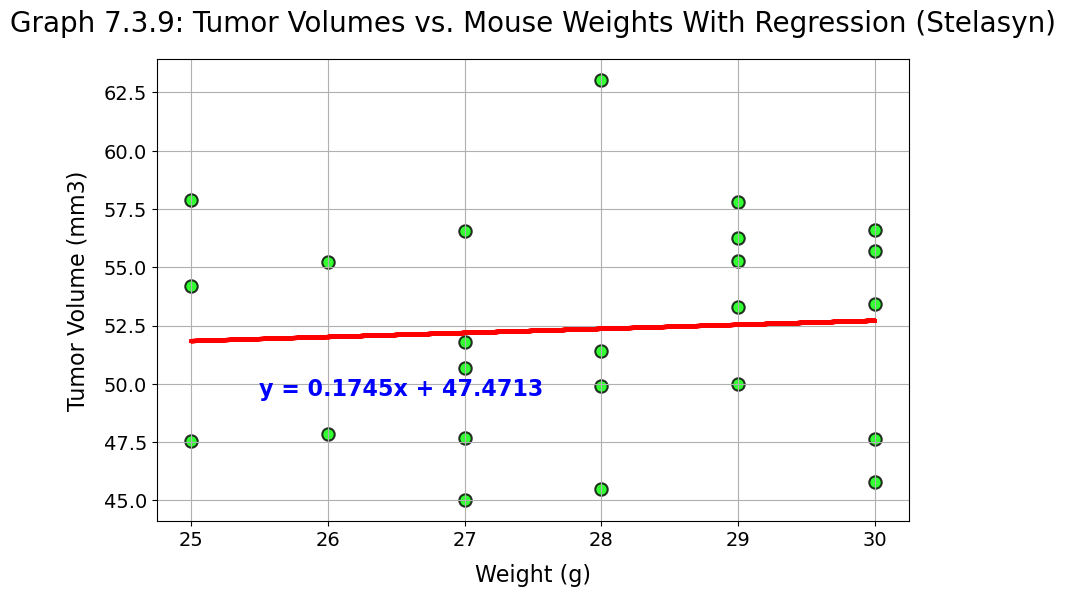

In [156]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (stelasynMedianWeightPerMouseSeries, 
         stelasynMedianTumorVolumePerMouseSeries, 
         'Graph 7.3.9: Tumor Volumes vs. Mouse Weights With Regression (Stelasyn)',
         1, 25.5, 49.5)

### **Display Tumor Volumes vs. Mouse Weights With Regression (Zoniferol)**

r-value:     -0.3136
r-squared:   0.0983



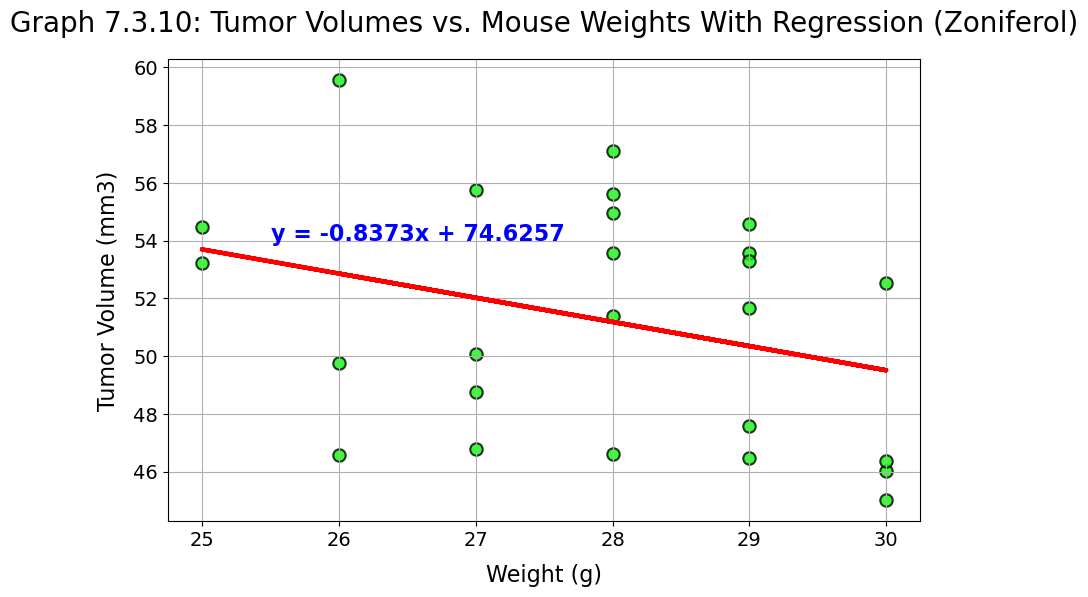

In [157]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (zoniferolMedianWeightPerMouseSeries, 
         zoniferolMedianTumorVolumePerMouseSeries, 
         'Graph 7.3.10: Tumor Volumes vs. Mouse Weights With Regression (Zoniferol)',
         1, 25.5, 54.0)

### **Display Tumor Volumes vs. Mouse Weights Plots with High Correlation**

r-value:     0.7669
r-squared:   0.5881

r-value:     0.6917
r-squared:   0.4784



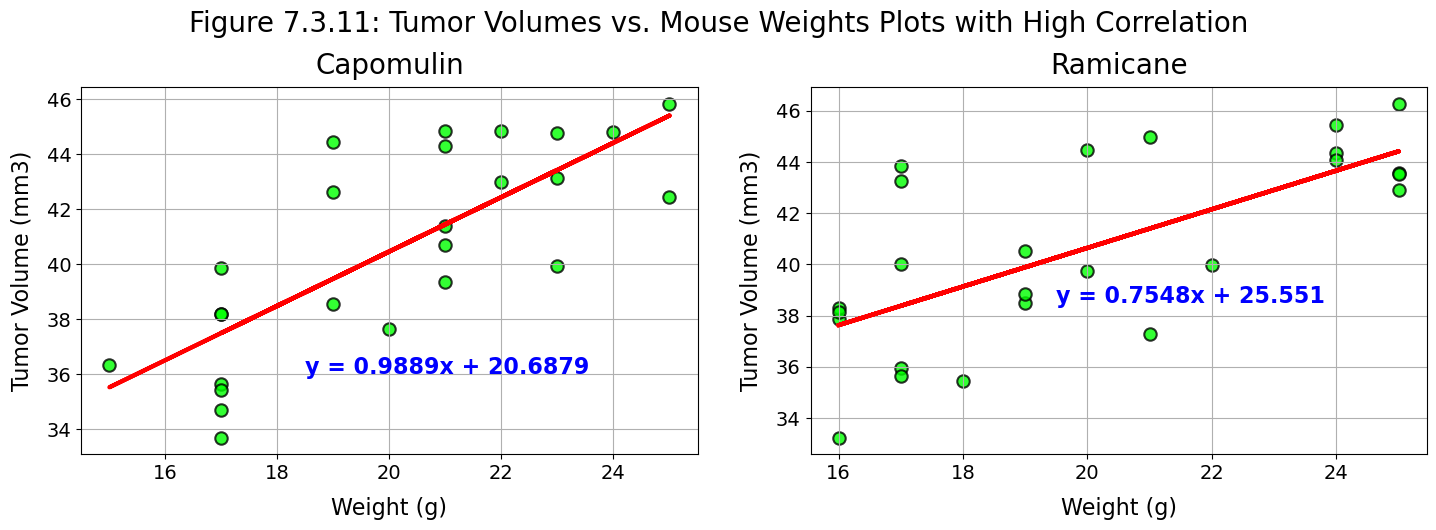

In [158]:
xSeriesList = []
ySeriesList = []

titleStringList = []

equationXCoordinateFloatList = []
equationYCoordinateFloatList = []


xSeriesList.append(capomulinMedianWeightPerMouseSeries)
xSeriesList.append(ramicaneMedianWeightPerMouseSeries)

ySeriesList.append(capomulinMedianTumorVolumePerMouseSeries)
ySeriesList.append(ramicaneMedianTumorVolumePerMouseSeries)

titleStringList.append('Capomulin')
titleStringList.append('Ramicane')

equationXCoordinateFloatList.append(18.5)
equationXCoordinateFloatList.append(19.5)

equationYCoordinateFloatList.append(36.0)
equationYCoordinateFloatList.append(38.5)


subroutine \
    .DisplayTwoScatterPlotsSideBySide \
        (xSeriesList,
         ySeriesList,
         titleStringList,
         'Figure 7.3.11: Tumor Volumes vs. Mouse Weights Plots with High Correlation',
         'Weight (g)',
         'Tumor Volume (mm3)', 1,
         equationXCoordinateFloatList,
         equationYCoordinateFloatList)

## **Section 7.4: Mouse Weight Statistics**

### **Median Mouse Weights DataFrame**

In [159]:
medianMouseWeightsByIDSeries \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
        .median()


log_function \
    .DebugReturnObjectWriteObject \
        (medianMouseWeightsByIDSeries)

In [160]:
drugRegimenByIDSeries \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Drug Regimen'] \
        .unique()

for index, row in enumerate (drugRegimenByIDSeries):
    
    drugRegimenByIDSeries[index] = row[0]
    
    
log_function \
    .DebugReturnObjectWriteObject \
        (drugRegimenByIDSeries)

In [161]:
frameDictionary \
    = {'Drug Regimen': drugRegimenByIDSeries.tolist(),
       'Weight (g)': medianMouseWeightsByIDSeries}

medianMouseWeightsDataFrame \
    = pd \
        .DataFrame \
            (frameDictionary)

### **Display Mouse ID by Drug Regimen and Weight**

In [162]:
captionString \
    = 'Table 7.4.0: Mouse ID by Drug Regimen and Weight'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (medianMouseWeightsDataFrame.head(12), 
             captionString, 
             hideFlagBooleanParameter = False)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,Drug Regimen,Weight (g)
Mouse ID,,
a203,Infubinol,23.00
a251,Infubinol,25.00
a262,Placebo,29.00
a275,Ceftamin,28.00
a366,Stelasyn,29.00
a401,Zoniferol,25.00
a411,Ramicane,22.00
a444,Ramicane,25.00
a457,Ketapril,30.00


### **Populate Median Mouse Weight List**

In [163]:
mouseMedianWeightsSeriesList \
    = []

for regimenName in allDrugRegimenNamesList:

    regimenStudyDataFrame \
        = medianMouseWeightsDataFrame \
            .loc \
                [(medianMouseWeightsDataFrame \
                      ['Drug Regimen'] \
                  == regimenName), :]

    mouseMedianWeightsSeriesList \
        .append \
            (regimenStudyDataFrame \
                 ['Weight (g)'])


log_function \
    .DebugReturnObjectWriteObject \
        (mouseMedianWeightsSeriesList)

### **Display Mouse Weight Statistics**

In [164]:
local_subroutine \
    .DisplayTumorVolumeStatistics \
        (allDrugRegimenNamesList, 
         mouseMedianWeightsSeriesList,
         '7.4',
         'Mouse Weight')

Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
17.00,22.00,5.00,21.00,9.50,29.50,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
26.00,28.00,2.00,28.00,23.00,31.00,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
25.00,29.00,4.00,27.00,19.00,35.00,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
27.00,30.00,3.00,29.00,22.50,34.50,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
26.00,29.00,3.00,27.00,21.50,33.50,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
27.00,30.00,3.00,28.00,22.50,34.50,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
26.00,29.00,3.00,27.00,21.50,33.50,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
17.00,24.00,7.00,19.00,6.50,34.50,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
27.00,29.00,2.00,28.00,24.00,32.00,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
27.00,29.00,2.00,28.00,24.00,32.00,0


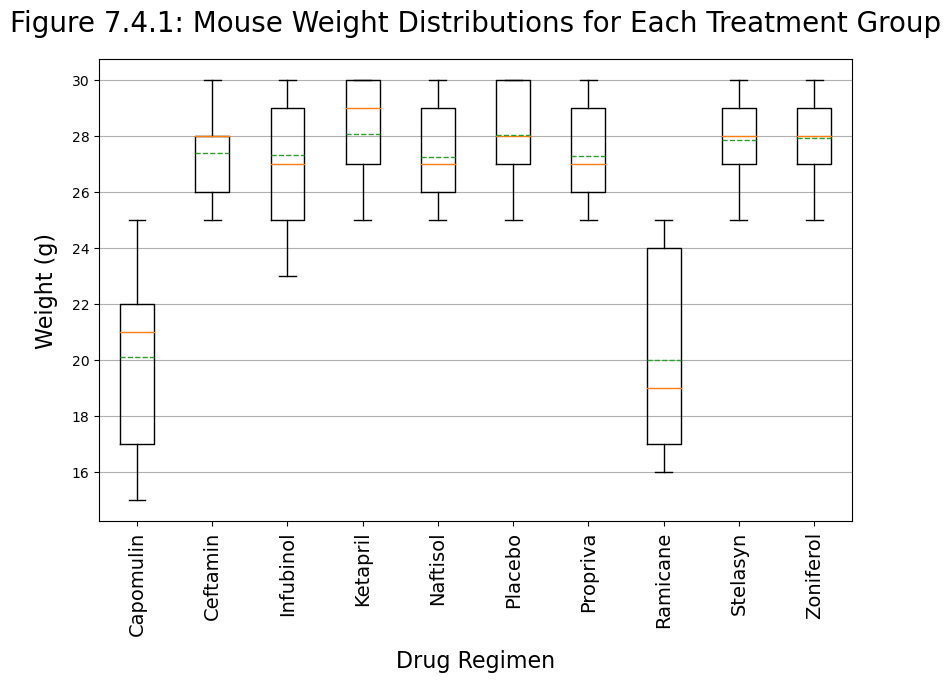

In [165]:
subroutine \
    .DisplayMatplotlibBoxPlotFromSeriesList \
        (mouseMedianWeightsSeriesList,
         allDrugRegimenNamesList,
         'Drug Regimen',
         'Weight (g)',
         'Figure 7.4.1: Mouse Weight Distributions for Each Treatment Group',
         xTicksRotationFloat = 90.0)

# <br> **Section 8: Male vs. Female Mouse Distribution**

## **Section 8.1: Mouse Count by Gender for Each Regimen**

### **Calculate Mouse Count by Gender (Capomulin)**

In [166]:
treatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] \
              == 'Capomulin'), :]

capomulinMouseCountByGenderSeries \
    = treatmentRegimensDataFrame \
            ['Sex'] \
        .value_counts() \
        .copy()


log_function \
    .DebugReturnObjectWriteObject \
        (capomulinMouseCountByGenderSeries)

### **Calculate Mouse Count by Gender (Ceftamin)**

In [167]:
treatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] \
              == 'Ceftamin'), :]

ceftaminMouseCountByGenderSeries \
    = treatmentRegimensDataFrame \
            ['Sex'] \
        .value_counts() \
        .copy()


log_function \
    .DebugReturnObjectWriteObject \
        (ceftaminMouseCountByGenderSeries)

### **Calculate Mouse Count by Gender (Infubinol)**

In [168]:
treatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] \
              == 'Infubinol'), :]

infubinolMouseCountByGenderSeries \
    = treatmentRegimensDataFrame \
            ['Sex'] \
        .value_counts() \
        .copy()


log_function \
    .DebugReturnObjectWriteObject \
        (infubinolMouseCountByGenderSeries)

### **Calculate Mouse Count by Gender (Ketapril)**

In [169]:
treatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] \
              == 'Ketapril'), :]

ketaprilMouseCountByGenderSeries \
    = treatmentRegimensDataFrame \
            ['Sex'] \
        .value_counts() \
        .copy()


log_function \
    .DebugReturnObjectWriteObject \
        (ketaprilMouseCountByGenderSeries)

### **Calculate Mouse Count by Gender (Naftisol)**

In [170]:
treatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] \
              == 'Naftisol'), :]

naftisolMouseCountByGenderSeries \
    = treatmentRegimensDataFrame \
            ['Sex'] \
        .value_counts() \
        .copy()


log_function \
    .DebugReturnObjectWriteObject \
        (naftisolMouseCountByGenderSeries)

### **Calculate Mouse Count by Gender (Placebo)**

In [171]:
treatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] \
              == 'Placebo'), :]

placeboMouseCountByGenderSeries \
    = treatmentRegimensDataFrame \
            ['Sex'] \
        .value_counts()


log_function \
    .DebugReturnObjectWriteObject \
        (placeboMouseCountByGenderSeries)

### **Calculate Mouse Count by Gender (Propriva)**

In [172]:
treatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] \
              == 'Propriva'), :]

proprivaMouseCountByGenderSeries \
    = treatmentRegimensDataFrame \
            ['Sex'] \
        .value_counts()


log_function \
    .DebugReturnObjectWriteObject \
        (proprivaMouseCountByGenderSeries)

### **Calculate Mouse Count by Gender (Ramicane)**

In [173]:
treatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] \
              == 'Ramicane'), :]

ramicaneMouseCountByGenderSeries \
    = treatmentRegimensDataFrame \
            ['Sex'] \
        .value_counts()


log_function \
    .DebugReturnObjectWriteObject \
        (ramicaneMouseCountByGenderSeries)

### **Calculate Mouse Count by Gender (Stelasyn)**

In [174]:
treatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] \
              == 'Stelasyn'), :]

stelasynMouseCountByGenderSeries \
    = treatmentRegimensDataFrame \
            ['Sex'] \
        .value_counts()


log_function \
    .DebugReturnObjectWriteObject \
        (stelasynMouseCountByGenderSeries)

### **Calculate Mouse Count by Gender (Zoniferol)**

In [175]:
treatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] \
              == 'Zoniferol'), :]

zoniferolMouseCountByGenderSeries \
    = treatmentRegimensDataFrame \
            ['Sex'] \
        .value_counts()


log_function \
    .DebugReturnObjectWriteObject \
        (zoniferolMouseCountByGenderSeries)

### **Calculate Mouse Count by Gender (All)**

In [176]:
mouseCountByGenderSeries \
    = cleanCompleteMedicalStudyDataFrame \
            ['Sex'] \
        .value_counts()


log_function \
    .DebugReturnObjectWriteObject \
        (mouseCountByGenderSeries)

### **Gender Count Distribution DataFrame**

In [177]:
frameDictionary \
    = {'Capomulin': capomulinMouseCountByGenderSeries,
       'Ceftamin': ceftaminMouseCountByGenderSeries,
       'Infubinol': infubinolMouseCountByGenderSeries,
       'Ketapril': ketaprilMouseCountByGenderSeries,
       'Naftisol': naftisolMouseCountByGenderSeries,
       'Placebo': placeboMouseCountByGenderSeries,
       'Propriva': proprivaMouseCountByGenderSeries,
       'Ramicane': ramicaneMouseCountByGenderSeries,
       'Stelasyn': stelasynMouseCountByGenderSeries,
       'Zoniferol': zoniferolMouseCountByGenderSeries}

mouseGenderCountDistributionDataFrame \
    = pd.DataFrame \
        (frameDictionary)

### **Display Mouse Gender Count Distribution by Drug Regimen**

In [178]:
captionString \
    = 'Table 8.1.1: Mouse Gender Count Distribution by Drug Regimen'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (mouseGenderCountDistributionDataFrame, 
             captionString, 
             hideFlagBooleanParameter = False)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Female,128,92,95,58,86,102,61,74,107,119
Male,102,86,83,130,100,79,87,154,74,63


### **Gender Percent Distribution DataFrame**

In [179]:
mouseGenderPercentDistributionDataFrame \
    = mouseGenderCountDistributionDataFrame \
        .apply \
            (lambda x: x/sum(x)*100, axis = 0)

displayDataFrame \
    = mouseGenderPercentDistributionDataFrame.copy()

for regimen in allDrugRegimenNamesList:
    displayDataFrame \
        .loc \
            [:, regimen] \
                = displayDataFrame \
                        [regimen] \
                    .map('{:.1f}%'.format)

### **Display Mouse Gender Percent Distribution by Drug Regimen**

In [180]:
captionString \
    = 'Table 8.1.2: Mouse Gender Percent Distribution by Drug Regimen'

currentStylerObject \
    = function \
        .ReturnStylerObjectStandardFormat \
            (displayDataFrame, 
             captionString, 
             hideFlagBooleanParameter = False)

log_function \
    .ReturnStylerObjectSavePNGImage \
        (currentStylerObject,
         captionString)

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Female,55.7%,51.7%,53.4%,30.9%,46.2%,56.4%,41.2%,32.5%,59.1%,65.4%
Male,44.3%,48.3%,46.6%,69.1%,53.8%,43.6%,58.8%,67.5%,40.9%,34.6%


## **Section 8.2: DisplayMale vs. Female Mouse Distribution**

### **Display Female vs. Male Distribution  (All)**

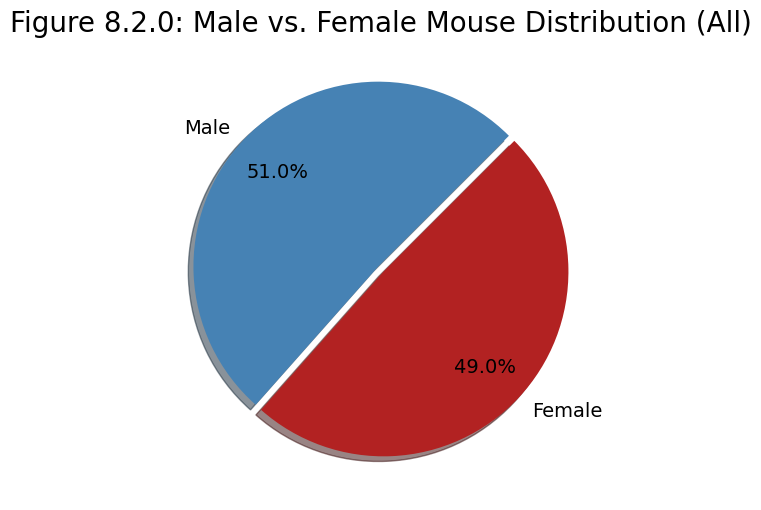

In [181]:
pieColorsList \
    = ['steelblue',
       'firebrick']

explodeTuple \
    = (0.02,
       0.02)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (mouseCountByGenderSeries,
         pieColorsList,
         explodeTuple,
         'Figure 8.2.0: Male vs. Female Mouse Distribution (All)')

### **Display Female vs. Male Distribution (Capomulin)**

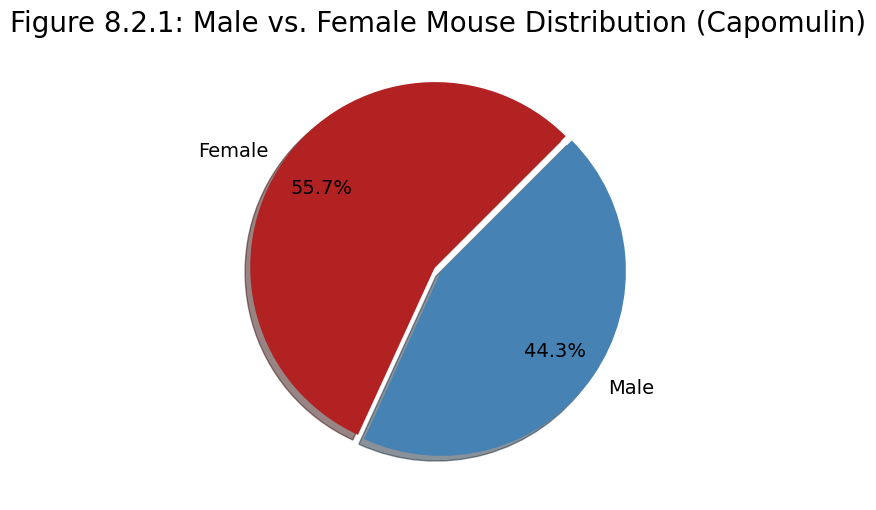

In [182]:
pieColorsList \
    = ['firebrick', 
       'steelblue']

explodeTuple \
    = (0.02,
       0.02)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (mouseGenderCountDistributionDataFrame['Capomulin'], 
         pieColorsList,
         explodeTuple,
         'Figure 8.2.1: Male vs. Female Mouse Distribution (Capomulin)')

### **Display Female vs. Male Distribution (Ceftamin)**

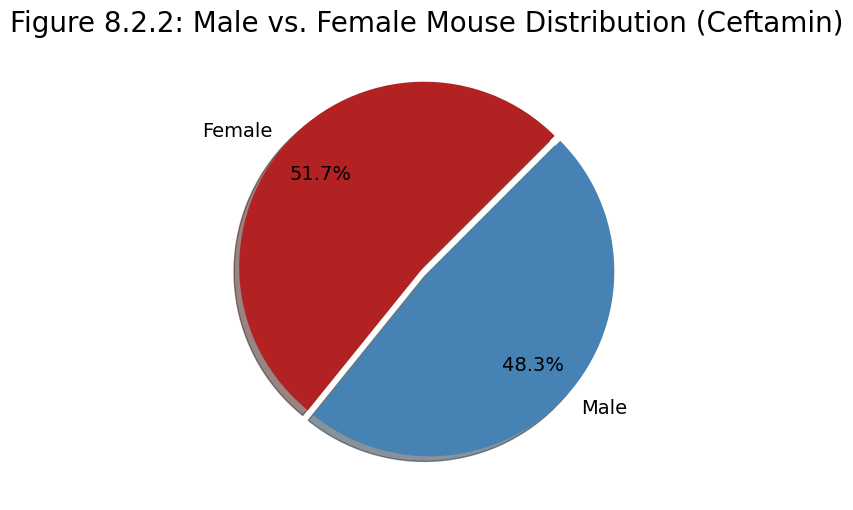

In [183]:
pieColorsList \
    = ['firebrick', 
       'steelblue']

explodeTuple \
    = (0.02,
       0.02)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (ceftaminMouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 8.2.2: Male vs. Female Mouse Distribution (Ceftamin)')

### **Display Female vs. Male Distribution (Infubinol)**

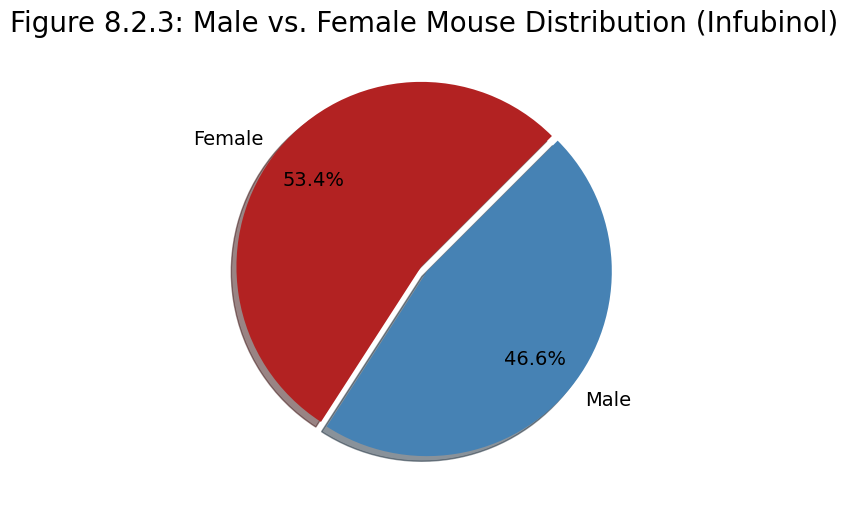

In [184]:
pieColorsList \
    = ['firebrick', 
       'steelblue']

explodeTuple \
    = (0.02,
       0.02)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (infubinolMouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 8.2.3: Male vs. Female Mouse Distribution (Infubinol)')

### **Display Female vs. Male Distribution (Ketapril)**

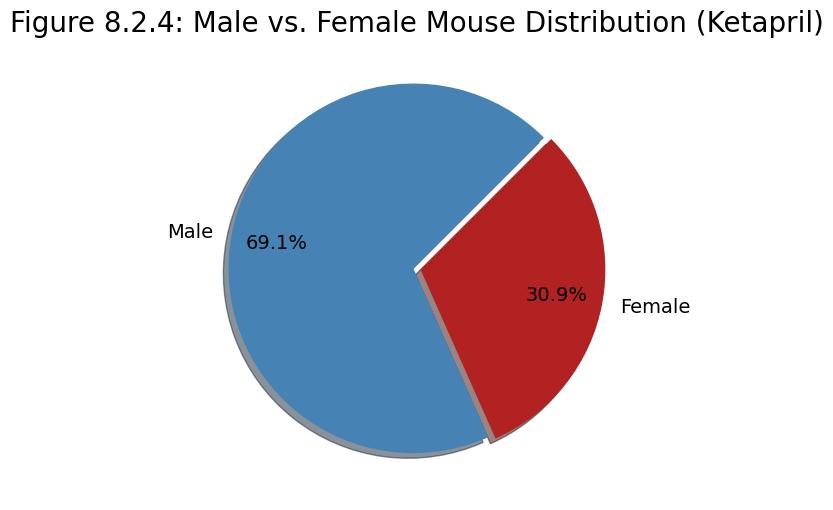

In [185]:
pieColorsList \
    = ['steelblue',
       'firebrick']

explodeTuple \
    = (0.02,
       0.02)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (ketaprilMouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 8.2.4: Male vs. Female Mouse Distribution (Ketapril)')

### **Display Female vs. Male Distribution (Naftisol)**

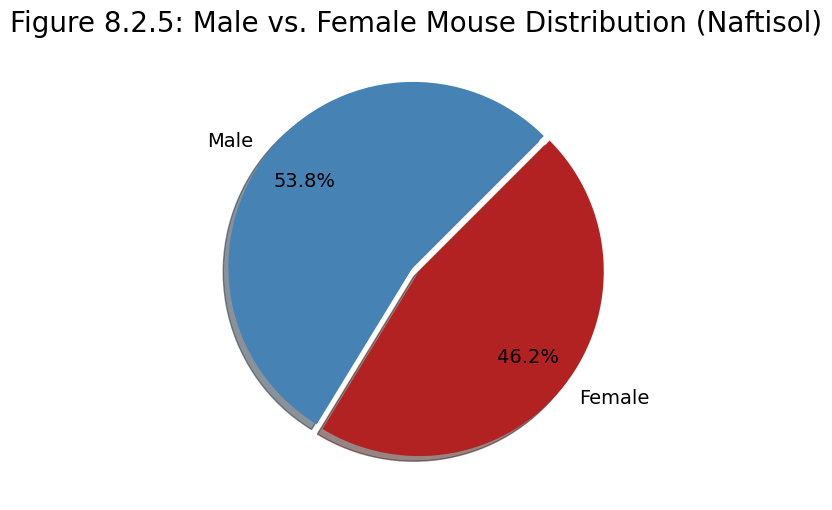

In [186]:
pieColorsList \
    = ['steelblue',
       'firebrick']

explodeTuple \
    = (0.02,
       0.02)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (naftisolMouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 8.2.5: Male vs. Female Mouse Distribution (Naftisol)')

### **Display Female vs. Male Distribution (Placebo)**

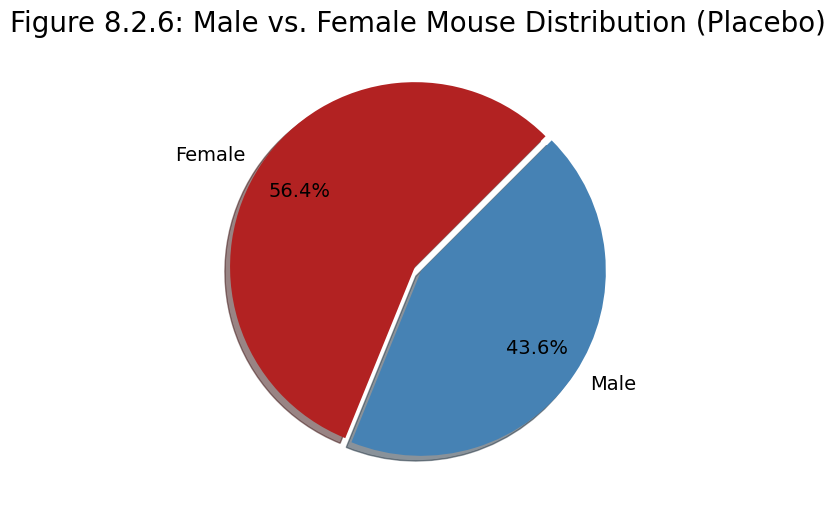

In [187]:
pieColorsList \
    = ['firebrick', 
       'steelblue']

explodeTuple \
    = (0.02,
       0.02)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (placeboMouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 8.2.6: Male vs. Female Mouse Distribution (Placebo)')

### **Display Female vs. Male Distribution (Propriva)**

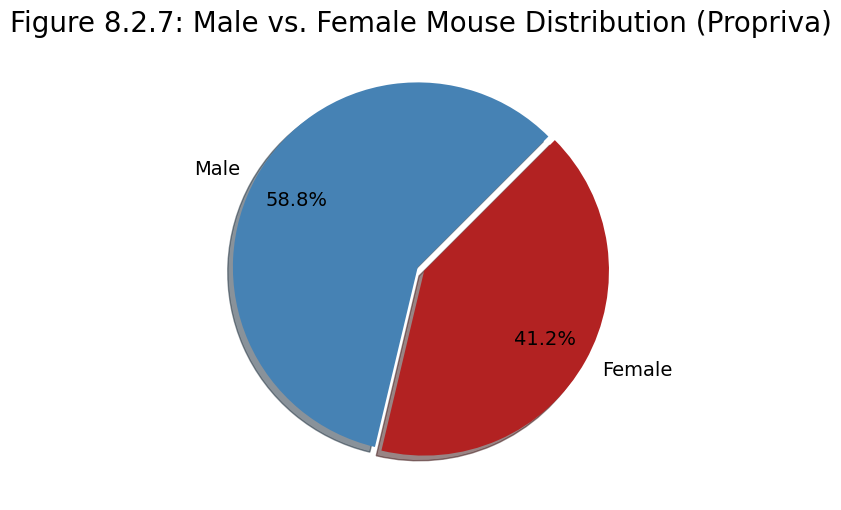

In [188]:
pieColorsList \
    = ['steelblue',
       'firebrick']

explodeTuple \
    = (0.02,
       0.02)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (proprivaMouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 8.2.7: Male vs. Female Mouse Distribution (Propriva)')

### **Display Female vs. Male Distribution (Ramicane)**

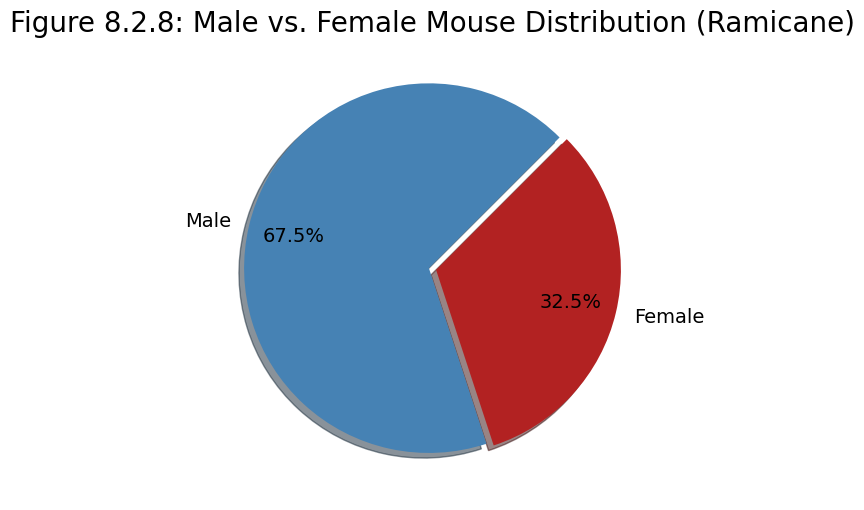

In [189]:
pieColorsList \
    = ['steelblue',
       'firebrick']

explodeTuple \
    = (0.02,
       0.02)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (ramicaneMouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 8.2.8: Male vs. Female Mouse Distribution (Ramicane)')

### **Display Female vs. Male Distribution (Stelasyn)**

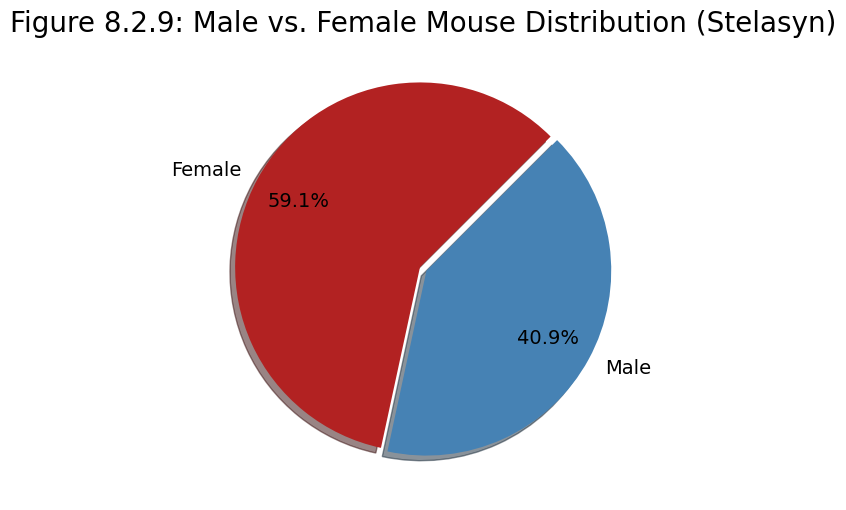

In [190]:
pieColorsList \
    = ['firebrick', 
       'steelblue']

explodeTuple \
    = (0.02,
       0.02)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (stelasynMouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 8.2.9: Male vs. Female Mouse Distribution (Stelasyn)')

### **Display Female vs. Male Distribution (Zoniferol)**

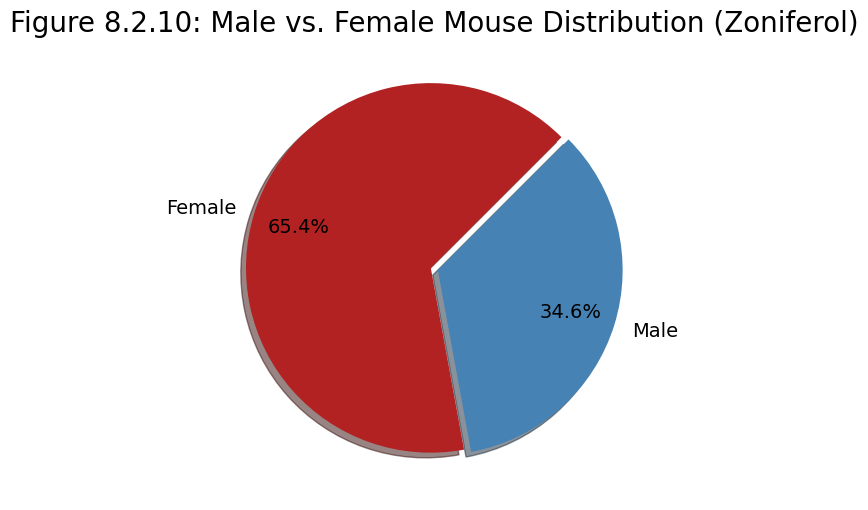

In [191]:
pieColorsList \
    = ['firebrick', 
       'steelblue']

explodeTuple \
    = (0.02,
       0.02)

subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (zoniferolMouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 8.2.10: Male vs. Female Mouse Distribution (Zoniferol)')

### **Display Female vs. Male Distribution (All)**

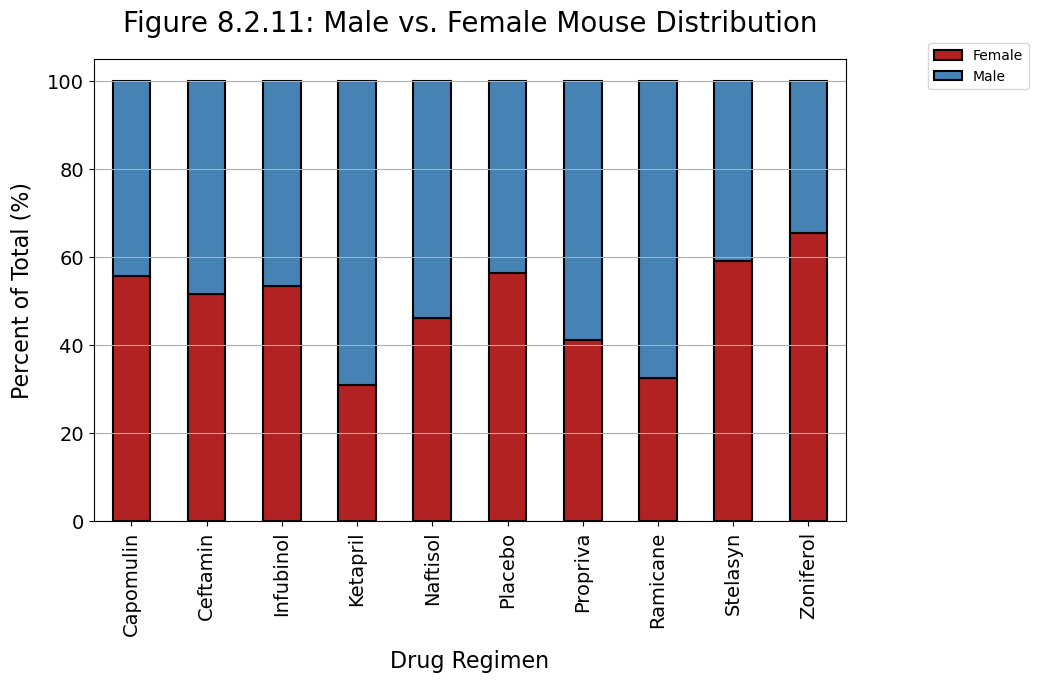

In [192]:
subroutine \
    .DisplayStackedBarChartFromDataFrame \
        (mouseGenderPercentDistributionDataFrame \
             .transpose(),
         'Figure 8.2.11: Male vs. Female Mouse Distribution',
         'Drug Regimen',
         'Percent of Total (%)',
         barColorsListParameter \
             = ['firebrick', 
                'steelblue'],
         lineWidthFloatParameter \
            = 1.5)

In [193]:
#log_subroutine \
#    .EndProgramExecution()